# SIMPLE WORKFLOW FOR SPATIAL TRANSCRIPTOMICS ANALYSIS

## PARAMETERS

In [1]:
# fileforloading = 'Spatialanalysis_SejongIn_Segment.id_FullROI_Y_cellselection_Y_Cardiomyocytes_No_segmentation_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_ID.block.core_Institute_KR_Y2022-10-17_analysis'

# load(paste0(fileforloading, ".RData"))


In [2]:
# ##################################################################
# 'TMA.block'
# 'ROI.size'
# 'Ventricle'
# 'Segment.id'
# 'Segment.type' -> "celltype"
# 'PID'
# 'Operation'
# 'Fixation.interval'
# 'Gender'
# 'Age'
# 'Institute'
# 'Clinical_phenotype_path'
# 'Clinical_endstage'
# 'After_LVAD'
# 'P_Normal'
# 'P_Degeneration''P_Hypertrophy''P_Disarray''P_Fibrosis''P_peri_infarction''P_etc'
# 'Echo_date''Echo_LVEF''Echo_LVPWd''Echo_IVSd''Echo_chamber_size''Echo_RWMA''Echo_RV_dysfunction''Echo_AR''Echo_MR''Echo_TR'
# 'ECG_date''ECG_voltage''ECG_QRS''VTandVF''AF''BNP''Probnp''CardiacMR_DE''Gene'
# 'ECG_voltage_n''ECG_QRS_n'
# 'Core.c.fullROI'
# 'PID.Op''PID.Op.bothblock''ROI.bothsize'
# 'Clinical_phenotype_LV''Clinical_phenotype_tri''Clinical_phenotype_bi'

# Number of core to use for DREAM analysis
 NoCore = 16 # 8

# # Condition of interest (among column names of met)
  # COI <- "P_Normal"   # COI <- "celltype" 
    COI <- "Segment.id" 
# USING ONLY SPECIFIC SET of CORES - For example cores with full ROI 
  FullROI_selection <- "Y"
  # FullROI_selection <- "N"

# CELL TYPE SELECTION?
  # celltype_selection <- "N"  # or "N"
  celltype_selection <- "Y"  # or "N"
  cell_type_var <- "Segment.id"

# disease_selection_var <- "Clinical_phenotype_LV"
    cell_type_vector <- c("Cardiomyocytes", "No_segmentation") 
    #'Cardiomyocytes''No_segmentation''Endothelial_cells''Fibroblasts'

    cell_type <- if(celltype_selection == "Y") {cell_type = cell_type_vector
                                                  }else{cell_type= "Non"
                                                       }


# ROISIZE SELECTION?
 ROISIZE_selection <- "Y" # or "N"
 ROIsize <- "large" # or ...

# VENTRICLE SELECTION?
    # ventricle_selection <- "N"
    ventricle_selection <- "Y" # or "N"
    ventricle_type <- "LV"

# Clinical Disease selection with control samples

    # disease_selection <- "Y"
    disease_selection <- "N"

    disease_selection_var <- "Clinical_phenotype_LV"
    disease_type_vector <- c("Control", "ES_HCMP", "NES_HCMP")  ## Clinical_phenotype_LV - 'ES_HCMP''ICMP''Control''DCMP''NES_HCMP'
    disease_type <- if(disease_selection == "Y") {disease_type = disease_type_vector
                                                  }else{disease_type= "Non"
                                                       }

# OUTLIER SELECTION?
 # if no 
  grid_set = "Y" 
  # grid_set = "N"

 # choose which grid set to use from the PCAgrid()
if (grid_set == "N") {
    outlier_set = "N"
    } else {
    outlier_set =  "pcaplot_outlier" #"pca_grid_10"# "pca_grid_10" # or pca_grid_10, pca_grid_3, etc
}

RE1 = "ID.block.core"
RE2 = "Institute"
# RE3 = "Fixation.interval"
# RE4 = "P_Normal"
# RE4 = "Clinical_phenotype_LV"
# RE4 = "..." 
#...

if (exists("RE4")==TRUE) {
    (form <- formula(paste("~", "condition + (1|", RE1, ") + (1|", RE2, ") + (1|", RE3, ") + (1|", RE4, ")", collapse="")))
    (form_cont <- formula(paste("~ 0 +", "condition + (1|", RE1, ") + (1|", RE2, ") + (1|", RE3, ") + (1|", RE4, ")", collapse="")))
# RE names
    (RE_names <- paste(RE1, RE2, RE3, RE4, sep="_"))
    }else{
    if (exists("RE3")==TRUE) {
        (form <- formula(paste("~", "condition + (1|", RE1, ") + (1|", RE2, ") + (1|", RE3, ")", collapse="")))
        (form_cont <- formula(paste("~ 0 +", "condition + (1|", RE1, ") + (1|", RE2, ") + (1|", RE3, ")", collapse="")))

# RE names
        (RE_names <- paste(RE1, RE2, RE3, sep="_"))
        }else{
        if (exists("RE2")==TRUE) {
            (form <- formula(paste("~", "condition + (1|", RE1, ") + (1|", RE2, ")", collapse="")))
            (form_cont <- formula(paste("~ 0 +", "condition + (1|", RE1, ") + (1|", RE2, ")", collapse="")))

# RE names
            (RE_names <- paste(RE1, RE2, sep="_"))
            }else{
            if (exists("RE1")==TRUE) {
                (form <- formula(paste("~", "condition + (1|", RE1, ")", collapse="")))
                (form_cont <- formula(paste("~ 0 +", "condition + (1|", RE1, ")", collapse="")))

# RE names
                (RE_names <- paste(RE1, sep="_"))
                }else{
                (form <- formula(paste("~", "condition", collapse="")))
                (form_cont <- formula(paste("~ 0 +", "condition", collapse="")))

# RE names
                (RE_names <- paste(No, sep="_"))
                }
        }
    }
}
                
# Decide Contrast for DREAM

# makecontrastasroutine <- "celltype_comwith_othercells" 
# makecontrastasroutine <- "Forclinicaldisease" # or "Y" to make it according to the number of condition
makecontrastasroutine <- "Y" #to make it according to the number of condition

# Small sample number analysis 
 KRanaly <- "Y"
 # KRanaly <- "N"
# Order of batch correction
# Cell-type selection -> Batch correction

# Outlier 
# remove Sejong
# Normalization method = Upper quartile 
# ##################################################################

[1] "ID.block.core_Institute"

In [3]:
(Analysis_name = paste("SejongIn_", COI, "_FullROI_", FullROI_selection, 
                      "_cellselection_", celltype_selection,
                                "_", paste0(cell_type, collapse="_"), 
                                "_ROI_", ROIsize,
                                "_Vent_", ventricle_type,
                                "_DsSelect_", paste0(disease_type, "_", collapse="_"), disease_selection, 
                                "_", "OL_", outlier_set,
                                "_RE_", RE_names,
                                "_KR_", KRanaly,
                      Sys.Date(), sep=""))

[1] "SejongIn_Segment.id_FullROI_Y_cellselection_Y_Cardiomyocytes_No_segmentation_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_ID.block.core_Institute_KR_Y2023-06-22"

In [4]:
paste0(cell_type, "_", collapse="_")

[1] "Cardiomyocytes__No_segmentation_"

In [5]:
Analysis_name

[1] "SejongIn_Segment.id_FullROI_Y_cellselection_Y_Cardiomyocytes_No_segmentation_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_ID.block.core_Institute_KR_Y2023-06-22"

# PREPARATION

## Set up library

In [6]:
# R.Version()
# BiocManager::install(version = "3.14")
# BiocManager::install("sva")
# BiocManager::install("ggplot2")
# BiocManager::install("gridExtra")
# BiocManager::install("edgeR")
# BiocManager::install("UpSetR")
# BiocManager::install("tidyverse")
# BiocManager::install("BatchQC")
# BiocManager::install("RUVSeq")
# BiocManager::install("RColorBrewer")
# BiocManager::install("Glimma")
# BiocManager::install("variancePartition")
# BiocManager::install("BiocParallel")
# install.packages("gplots")
# install.packages("NMF")
# BiocManager::install("GO.db")
# BiocManager::install("org.Hs.eg.db")
# devtools::install_github("GabrielHoffman/variancePartition")
# remotes::install_github("valentint/rrcov")
# BiocManager::install("GSA")
# BiocManager::install("RCurl")
# BiocManager::install("RCy3")

In [7]:
library("sva")
library("ggplot2")
library("gridExtra")
library("edgeR")
library("UpSetR")
library("tidyverse")
library("BatchQC")
library("RColorBrewer")
library("Glimma")
library("variancePartition")
library("BiocParallel")
library("gplots")
library("NMF")
library("GO.db")
library("org.Hs.eg.db")
library(preprocessCore)
library(genefilter)
library(matrixStats)
library(rafalib)
library(PCAtools)
library(Biobase)
library(GEOquery)
library(bigutilsr)
library(spatstat)
library(matrixStats)
library(RCurl)
library(GSA)
library(RCy3)
library(fgsea)
library(data.table)
# library(plotly) # has conflict with org.Hs.eg.db select
# library(rrcov) # has conflict with biplot detach(rrcov)
library(DT) 
library(grid)
library(ComplexHeatmap)
library(cluster)

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.8-42. For overview type 'help("mgcv-package")'.

Loading required package: genefilter

Loading required package: BiocParallel

Loading required package: limma

-- Attaching core tidyverse packages --------------------------------------------------------------------- tidyverse 2.0.0 --
v dplyr     1.1.0     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.0
v purrr     1.0.1     v tidyr     1.3.0
-- Conflicts --------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::collapse() masks nlme::collapse()
x dplyr::combine()  masks gridExtra::combine()
x dplyr::filter()   masks stats::filter()
x dplyr::lag()      masks stats::lag()
x readr::spec()     masks genefilter::spec()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'gplots'




In [8]:
options(repr.plot.width=20, repr.plot.height=10)


## FUNCTIONS

### Function to select groups according to phenotype

In [9]:
# if want to choose phenotpye dataset w, colname x , variable y, expressiondataset z)
# example 
# X="Segment.id"
# Y="Cardiomyocytes"
# W="p"
# Z="e_abc"

select_group <- function(x,y,w,z){
    df_p <- get(w)
    
assign(paste(w, y, sep="_"),df_p[df_p[[x]]==y,], envir = parent.frame()) # envir = parent.frame() to use the new variable out of function
    # use assign instaed of <- due to paste make "" 
    # use [[]] instaed of $
    df_e <- get(z)
    df_p_new <- get(paste(w, y, sep="_"))

assign(paste(z, y, sep="_"), df_e[,colnames(df_e)%in%rownames(df_p_new)], envir = parent.frame())    
    df_e_new <- get(paste(z, y, sep="_"))

print(paste("the samples in phenotype and expression data is identical:", identical(colnames(df_e_new), rownames(df_p_new))))

print(paste("the file name of the phenotype data is ", w, "_", y, sep=""))
print(paste("and the sample count in phenotype data is", dim(df_p_new)[1]))
print(paste("the file name of the expression data is ", z, "_", y, sep=""))
print(paste("and the sample count in expression data is", dim(df_e_new)[2]))
    }

# # example of the outcome
# [1] "the samples in phenotype and expression data is identical: TRUE"
# [1] "the file name of the phenotype data is p_Cardiomyocytes"
# [1] "and the sample count in phenotype data is 91"
# [1] "the file name of the expression data is e_abc_Cardiomyocytes"
# [1] "and the sample count in expression data is 91"


### Function to remove group according to a phenotype

In [10]:
# if want to choose phenotpye dataset w, colname x , variable y, expressiondataset z)
# example 
# X="Institute"
# Y="Sejong"
# W="met"
# Z="exp_rmnp"

remove_group <- function(x,y,w,z){
    df_p <- get(w)
    
assign(paste(w, y, sep="_rm_"),df_p[df_p[[x]]!=y,], envir = parent.frame()) # envir = parent.frame() to use the new variable out of function
    # use assign instaed of <- due to paste make "" 
    # use [[]] instaed of $
    df_e <- get(z)
    df_p_new <- get(paste(w, y, sep="_rm_"))

assign(paste(z, y, sep="_rm_"), df_e[,colnames(df_e)%in%rownames(df_p_new)], envir = parent.frame())    
    df_e_new <- get(paste(z, y, sep="_rm_"))

print(paste("the samples in phenotype and expression data is identical:", identical(colnames(df_e_new), rownames(df_p_new))))

print(paste("the file name of the phenotype data is ", w, "_rm_", y, sep=""))
print(paste("and the sample count in phenotype data is", dim(df_p_new)[1]))
print(paste("the file name of the expression data is ", z, "_rm_", y, sep=""))
print(paste("and the sample count in expression data is", dim(df_e_new)[2]))
    }

# # example of the outcome
# [1] "the samples in phenotype and expression data is identical: TRUE"
# [1] "the file name of the phenotype data is p_Cardiomyocytes"
# [1] "and the sample count in phenotype data is 91"
# [1] "the file name of the expression data is e_abc_Cardiomyocytes"
# [1] "and the sample count in expression data is 91"

### Function to select groups according to multiple phenotypes

In [11]:
# if want to choose phenotpye dataset w, colname x , vector of variables y, expressiondataset z)
# example ## select Control, HCMP only
# HCMPs <- c('Control','ES_HCMP', 'NES_HCMP') # Name of phenotypes to compare
# X="Clinical_phenotype_2nd"
# Y="HCMPs"
# W="p_Cardiomyocytes_rm_sp_gridflag_large_LV"
# Z="e_cmc_cb_rm_sp_gridflag_large_LV"

select_group_m <- function(x,y,w,z){
    df_p <- get(w)
    df_y <- get(y)
assign(paste(w, y, sep="_"),df_p[df_p[[x]]%in%df_y,], envir = parent.frame()) # envir = parent.frame() to use the new variable out of function
    # use assign instaed of <- due to paste make "" 
    # use [[]] instaed of $
    df_e <- get(z)
    df_p_new <- get(paste(w, y, sep="_"))

assign(paste(z, y, sep="_"), df_e[,colnames(df_e)%in%rownames(df_p_new)], envir = parent.frame())    
    df_e_new <- get(paste(z, y, sep="_"))

print(paste("the samples in phenotype and expression data is identical:", identical(colnames(df_e_new), rownames(df_p_new))))

print(paste("the file name of the phenotype data is ", w, "_", y, sep=""))
print(paste("and the sample count in phenotype data is", dim(df_p_new)[1]))
print(paste("the file name of the expression data is ", z, "_", y, sep=""))
print(paste("and the sample count in expression data is", dim(df_e_new)[2]))
    }

# # example of the outcome
# [1] "the samples in phenotype and expression data is identical: TRUE"
# [1] "the file name of the phenotype data is p_Cardiomyocytes_rm_sp_gridflag_large_LV_HCMPs"
# [1] "and the sample count in phenotype data is 30"
# [1] "the file name of the expression data is e_cmc_cb_rm_sp_gridflag_large_LV_HCMPs"
# [1] "and the sample count in expression data is 30"


### Function to remove specific samples 

In [12]:
# if want to choose phenotpye dataset y, vector of samples to remove x, expressiondataset z)
# example vectors from pca_grid 
# sp_gridflag <-names(pca_grid_all$flag[pca_grid_all$flag==FALSE])
# X="sp_gridflag"
# Y="p_Cardiomyocytes"
# Z="e_cmc_cb_nl"
# df_p[!(rownames(df_p)%in%df_s),]
# df_e[,!(colnames(df_e)%in%df_s)]
remove_sample <- function(x,y,z){
    df_p <- get(y)
    df_e <- get(z)
    df_s <- get(x)
# new phenotype dataset    
assign(paste(y, x, sep="_rm_"), df_p[!(rownames(df_p)%in%df_s),], envir = parent.frame()) # envir = parent.frame() to use the new variable out of function
    # use assign instaed of <- due to paste make "" 
    df_p_new <- get(paste(y, x, sep="_rm_"))

assign(paste(z, x, sep="_rm_"), df_e[,!(colnames(df_e)%in%df_s)], envir = parent.frame())    
    df_e_new <- get(paste(z, x, sep="_rm_"))

print(paste("the samples in phenotype and expression data is identical:", identical(colnames(df_e_new), rownames(df_p_new))))

print(paste("the file name of the phenotype data is ", y, "_rm_", x, sep=""))
print(paste("and the sample count in phenotype data is", dim(df_p_new)[1]))
print(paste("the file name of the expression data is ", z, "_rm_", x, sep=""))
print(paste("and the sample count in expression data is", dim(df_e_new)[2]))
    }

# # example of the outcome
# [1] "the samples in phenotype and expression data is identical: TRUE"
# [1] "the file name of the phenotype data is p_Cardiomyocytes_rm_sp_gridflag"
# [1] "and the sample count in phenotype data is 86"
# [1] "the file name of the expression data is e_cmc_cb_nl_rm_sp_gridflag"
# [1] "and the sample count in expression data is 86"

### Function to select specific samples

In [13]:
# if want to choose phenotpye dataset y, vector of samples to remove x, expressiondataset z)
# example vectors from pca_grid 
# sp_gridflag <-names(pca_grid_all$flag[pca_grid_all$flag==FALSE])
# X="sp_gridflag"
# Y="p_Cardiomyocytes"
# Z="e_cmc_cb_nl"
# df_p[!(rownames(df_p)%in%df_s),]
# df_e[,!(colnames(df_e)%in%df_s)]
select_sample <- function(x,y,z){
    df_p <- get(y)
    df_e <- get(z)
    df_s <- get(x)
# new phenotype dataset    
assign(paste(y, x, sep="_w_"), df_p[(rownames(df_p)%in%df_s),], envir = parent.frame()) # envir = parent.frame() to use the new variable out of function
    # use assign instaed of <- due to paste make "" 
    df_p_new <- get(paste(y, x, sep="_w_"))

assign(paste(z, x, sep="_w_"), df_e[,(colnames(df_e)%in%df_s)], envir = parent.frame())    
    df_e_new <- get(paste(z, x, sep="_w_"))

print(paste("the samples in phenotype and expression data is identical:", identical(colnames(df_e_new), rownames(df_p_new))))

print(paste("the file name of the phenotype data is ", y, "_w_", x, sep=""))
print(paste("and the sample count in phenotype data is", dim(df_p_new)[1]))
print(paste("the file name of the expression data is ", z, "_w_", x, sep=""))
print(paste("and the sample count in expression data is", dim(df_e_new)[2]))
    }

# # example of the outcome
# [1] "the samples in phenotype and expression data is identical: TRUE"
# [1] "the file name of the phenotype data is p_Cardiomyocytes_rm_sp_gridflag"
# [1] "and the sample count in phenotype data is 86"
# [1] "the file name of the expression data is e_cmc_cb_nl_rm_sp_gridflag"
# [1] "and the sample count in expression data is 86"

### Function to compare two sample's correlation - 1 : qqplot_bc_nl(x,y)

In [14]:
### Function to compare two sample's correlation - 1 : qqplot_bc_nl(x,y)
## my first function
## making function par(mfrow=c(2,2))
qqplot_bc_nl <- function(x, y) {
    print(paste("Comparing", x, " and ", y, "with qqplot"))
    par(mfrow=c(2,4))

# exp_out : before batch correction
qqplot(log2(exp_out[,x]+1), log2(exp_out[,y]+1), main="before batch corr and normalization, log2")
abline(c(0,1), col=1, lwd=3)

qqplot(exp_out[,x], exp_out[,y], main="before batch corr and normalization")
abline(c(0,1), col=1, lwd=3)

# normalization before batch correction
# e_bb_norm = normalize.quantiles(as.matrix(exp_out))
# colnames(e_bb_norm) <- colnames(exp_out)
# rownames(e_bb_norm) <- rownames(exp_out)
    
qqplot(log2(e_bb_norm[,x]+1), log2(e_bb_norm[,y]+1), main="before batch corr after normalization, log2")
abline(c(0,1), col=1, lwd=3)

qqplot(e_bb_norm[,x], e_bb_norm[,y], main="before batch corr after normalization")
abline(c(0,1), col=1, lwd=3)

# after batch correction

qqplot(log2(e[,x]+1), log2(e[,y]+1), main="after batch corr before normalization, log2")
abline(c(0,1), col=1, lwd=3)

qqplot(e[,x], e[,y], main="after batch corr before normalization")
abline(c(0,1), col=1, lwd=3)

# after normalization
# e_norm = normalize.quantiles(as.matrix(e))
# colnames(e_norm) <- colnames(e)
# rownames(e_norm) <- rownames(e)

qqplot(log2(e_norm[,x]+1), log2(e_norm[,y]+1), main="after batch corr after normalization, log2")
abline(c(0,1), col=1, lwd=3)

qqplot(e_norm[,x], e_norm[,y], main="after batch corr after normalization")
abline(c(0,1), col=1, lwd=3)

}

### Function to compare two sample's correlation - 2 : maplot_bc_nl(x,y)

In [15]:
### Function to compare two sample's correlation - 2 : maplot_bc_nl(x,y)
# ## making second function
# plot(x,y,xlab="Father's height in inches",ylab="Son's height in inches",main=paste("correlation =",signif(cor(x,y),2)))

maplot_bc_nl <- function(x, y) {
    print(paste("Comparing", x, " and ", y, "with maplot"))
    par(mfrow=c(2,4))
    
# before batch correction

mm2 = log2(exp_out[,x]+1) - log2(exp_out[,y]+1)
aa2 = log2(exp_out[,x]+1) + log2(exp_out[,y]+1)
plot(aa2,mm2,col=2, main=paste("standard deviation", round(sd(mm2),2), "before batch corr before normalization, log2"))
abline(c(0,0), col=2, lwd=3)
    
mm = exp_out[,x] - exp_out[,y]
aa = (exp_out[,1]+exp_out[,2])/2
plot(aa,mm,col=2, main=paste("standard deviation", round(sd(mm),2), "before batch corr before normalization"))
abline(c(0,0), col=2, lwd=3)


# normalization before batch correction
mm2_normal = log2(e_bb_norm[,x]+1) - log2(e_bb_norm[,y]+1)
aa2_normal = log2(e_bb_norm[,x]+1) + log2(e_bb_norm[,y]+1)
plot(aa2_normal,mm2_normal,col=2, main=paste("standard deviation", round(sd(mm2_normal),2), "before batch corr after normalization, log2"))
abline(c(0,0), col=1, lwd=3)
  
    
mm_normal = e_bb_norm[,x] - e_bb_norm[,y]
aa_normal = (e_bb_norm[,x] + e_bb_norm[,y])/2
plot(aa_normal,mm_normal,col=2, main=paste("standard deviation", round(sd(mm_normal),2), "before batch corr after normalization"))
abline(c(0,0), col=2, lwd=3)
    

# after batch correction
    
mm1 = log2(e[,x]+1) - log2(e[,y]+1)
aa1 = log2(e[,x]+1) + log2(e[,y]+1)
plot(aa1,mm1,col=2 , main=paste("standard deviation", round(sd(mm1),2), "after batch corr before normalization, log2"))
abline(c(0,0), col=2, lwd=3)
    
mm_bc = e[,x] - e[,y]
aa_bc = (e[,x] + e[,y])/2
plot(aa_bc,mm_bc,col=2, main=paste("standard deviation", round(sd(mm_bc),2), "after batch corr before normalization"))
abline(c(0,0), col=2, lwd=3)
    
# normalization after batch correction
mm1_normal = log2(e_norm[,x]+1) - log2(e_norm[,y]+1)
aa1_normal = log2(e_norm[,x]+1) + log2(e_norm[,y]+1)
plot(aa1_normal,mm1_normal,col=2, main=paste("standard deviation", round(sd(mm1_normal),2), "after batch corr after normalization, log2"))
abline(c(0,0), col=1, lwd=3)
    
mm_bcnormal = e_norm[,x] - e_norm[,y]
aa_bcnormal = (e_norm[,x] + e_norm[,y])/2
plot(aa_bcnormal,mm_bcnormal,col=2, main=paste("standard deviation", round(sd(mm_bcnormal),2), "after batch corr after normalization"))
abline(c(0,0), col=2, lwd=3)

}

### Function to compare two sample's correlation - 3 : plot_bc_nl(x,y)

In [16]:
### Function to compare two sample's correlation - 3 : plot_bc_nl(x,y)
## making function par(mfrow=c(2,2))
# plot(x,y,xlab="Father's height in inches",ylab="Son's height in inches",main=paste("correlation =",signif(cor(x,y),2)))

plot_bc_nl <- function(x, y) {
    print(paste("Comparing", x, " and ", y, "with simple plot"))
    par(mfrow=c(2,4))

# exp_out : before batch correction
plot(log2(exp_out[,x]+1), log2(exp_out[,y]+1), main=paste("correlation=", signif(cor(log2(exp_out[,x]+1), log2(exp_out[,y]+1)),2),"before batch corr and normalization, log2"))
abline(c(0,1), col=1, lwd=3)

plot(exp_out[,x], exp_out[,y], main=paste("correlation=", signif(cor(exp_out[,x], exp_out[,y]),2),"before batch corr and normalization"))
abline(c(0,1), col=1, lwd=3)

# normalization before batch correction
# e_bb_norm = normalize.quantiles(as.matrix(exp_out))
# colnames(e_bb_norm) <- colnames(exp_out)
# rownames(e_bb_norm) <- rownames(exp_out)
    
plot(log2(e_bb_norm[,x]+1), log2(e_bb_norm[,y]+1), main=paste("correlation=", signif(cor(log2(e_bb_norm[,x]+1), log2(e_bb_norm[,y]+1)),2),"before batch corr after normalization, log2"))
abline(c(0,1), col=1, lwd=3)

plot(e_bb_norm[,x], e_bb_norm[,y], main=paste("correlation=", signif(cor(e_bb_norm[,x], e_bb_norm[,y]),2),"before batch corr after normalization"))
abline(c(0,1), col=1, lwd=3)

# after batch correction

plot(log2(e[,x]+1), log2(e[,y]+1), main=paste("correlation=", signif(cor(log2(e[,x]+1), log2(e[,y]+1)),2),"after batch corr before normalization, log2"))
abline(c(0,1), col=1, lwd=3)

plot(e[,x], e[,y], main=paste("correlation=", signif(cor(e[,x], e[,y]),2),"after batch corr before normalization"))
abline(c(0,1), col=1, lwd=3)

# after normalization
# e_norm = normalize.quantiles(as.matrix(e))
# colnames(e_norm) <- colnames(e)
# rownames(e_norm) <- rownames(e)

plot(log2(e_norm[,x]+1), log2(e_norm[,y]+1), main=paste("correlation=", signif(cor(log2(e_norm[,x]+1), log2(e_norm[,y]+1)),2),"after batch corr after normalization, log2"))
abline(c(0,1), col=1, lwd=3)

plot(e_norm[,x], e_norm[,y], main=paste("correlation=", signif(cor(e_norm[,x], e_norm[,y]),2),"after batch corr after normalization"))
abline(c(0,1), col=1, lwd=3)

}

### Function to compare two sample's correlation - 4 : summary_lm(x,y)

In [17]:
### Function to compare two sample's correlation - 4 : summary_lm(x,y)
## making function par(mfrow=c(2,2))
summary_lm <- function(x, y) {
print(paste("Comparing", x, " and ", y, "with linear regression"))

    a<-lm(log2(exp_out[,x]+1) ~ log2(exp_out[,y]+1))
    b<-lm(exp_out[,x] ~ exp_out[,y])
    
    c <- lm(log2(e_bb_norm[,x]+1) ~ log2(e_bb_norm[,y]+1))
    d <- lm(e_bb_norm[,x] ~ e_bb_norm[,y])

# after batch correction

    f <- lm(log2(e[,x]+1) ~ log2(e[,y]+1))
    g <- lm(e[,x] ~ e[,y])

# after normalization
    h <- lm(log2(e_norm[,x]+1) ~ log2(e_norm[,y]+1))
    i <- lm(e_norm[,x] ~ e_norm[,y])

    

    print("before batch correction before normalization")
    print(a$coefficients[2])
    print(b$coefficients[2])

    print("before batch correction after normalization")
    
    print(c$coefficients[2])
    print(d$coefficients[2])
    
    print("after batch correction before normalization")
    
    print(f$coefficients[2])
    print(g$coefficients[2])
    
    print("after batch correction after normalization")
    
    print(h$coefficients[2])
    print(i$coefficients[2])

}

### Function to compare two sample's distance - 5 : distance_eucl

In [18]:
# # calculate all euclidean distance first - for time saving once 
#     d_exp_out <- dist(t(exp_out))
#     d_e_bb_norm <- dist(t(e_bb_norm))
#     d_e <- dist(t(e))
#     d_e_norm <- dist(t(e_norm))

In [19]:
### Function to compare two sample's distance - 5 : distance_eucl(x,y)
## making function par(mfrow=c(2,2))
distance_eucl <- function(x, y) {
print(paste("Comparing", x, " and ", y, "with euclidean distance"))
# calculate all euclidean distance first - for time saving once 
    # d_exp_out <- dist(t(exp_out))
    # d_e_bb_norm <- dist(t(e_bb_norm))
    # d_e <- dist(t(e))
    # d_e_norm <- dist(t(e_norm))
    
    a<-as.matrix(d_exp_out)[x,y]
    b<-as.matrix(d_e_bb_norm)[x,y]
    c<-as.matrix(d_e)[x,y]
    d<-as.matrix(d_e_norm)[x,y]

    print("distance before batch correction before normalization")
    print(a)
    print("distance before batch correction after normalization")
    print(b)
    print("distance after batch correction before normalization")
    print(c)
    print("distance after batch correction after normalization")
    print(d)
    
}

# INPUT DATA

##  Input data - new 

In [20]:
# Decide Input file
Input_expr_data = "Probe_QC_1percfilter.csv"
Input_pheno_data = "Spatial_Annotation.csv"

# Read Input files
exp_qc <- read.csv(Input_expr_data, row.names = 1, header = TRUE, stringsAsFactors=FALSE)
met_tmp<- read.csv(Input_pheno_data, header=TRUE, stringsAsFactors=FALSE)

# Modify Input data
met_tmp <- met_tmp %>% mutate(Name=paste(Scan.name, formatC(ROI..label., width=3, flag="0"), Segment..Name..Label., sep="..."))
rownames(met_tmp)<- gsub(' ', '.', met_tmp$Name)

met<-met_tmp[match(colnames(exp_qc), rownames(met_tmp)),]
identical(colnames(exp_qc), rownames(met))

met <- met %>% mutate(TMA.block = factor(TMA.block))

met <- met %>% mutate(Clinical_phenotype_LV = ifelse(Clinical_phenotype_path == "RVF" | Clinical_phenotype_path == "Heart-LungTPL", "Control",
                                              Clinical_phenotype_path))

met <- met %>% mutate(Clinical_phenotype_tri = ifelse(Clinical_phenotype_LV == "ICMP" | Clinical_phenotype_LV == "DCMP" | Clinical_phenotype_LV == "ES_HCMP", "Endstage",
                                              Clinical_phenotype_LV))

met <- met %>% mutate(Clinical_phenotype_bi = ifelse(Clinical_phenotype_LV == "ICMP" | Clinical_phenotype_LV == "DCMP" | Clinical_phenotype_LV == "ES_HCMP" | Clinical_phenotype_LV == "NES_HCMP", "Diseased",
                                              Clinical_phenotype_LV))



[1] TRUE

In [21]:
celltype <- as.factor(met$Segment..Name..Label.)
celltype <- gsub("Full ROI", "No_Seg",celltype) 
celltype <- gsub("Trp", "CMC", celltype)
celltype <- gsub("vessel", "EC", celltype)
celltype <- gsub("fb", "FB", celltype)

In [22]:
met <- cbind(met, celltype)

## Remove negative probe

In [23]:
negprobe=which(rownames(exp_qc)%in%"NegProbe-WTX")

class(negprobe)

exp_rmnp <- exp_qc[-negprobe,]
dim(exp_rmnp)
dim(exp_qc)

[1] "integer"

[1] 12800   178

[1] 12801   178

## GENE ANNOTATION (GENEID)

In [24]:
if ("plotly" %in% tolower((.packages())) == TRUE) {
    detach("package:plotly", unload=TRUE)
    }

In [25]:
symbols <- rownames(exp_rmnp)

In [26]:
fdata <- select(org.Hs.eg.db, symbols, c("ENTREZID", "GENENAME"), "SYMBOL")

'select()' returned 1:many mapping between keys and columns



In [27]:
identical(fdata$SYMBOL,symbols)

[1] FALSE

In [28]:
## There are duplicates and missing

In [29]:
## first remove duplicates

In [30]:
## MENO1 take 51072 according to nanostring excel information

In [31]:
which(fdata$SYMBOL=="MEMO1")

[1] 17 18

In [32]:
fdata_nodup <- fdata[-17,]

In [33]:
dim(fdata_nodup)

[1] 12800     3

In [34]:
which(fdata_nodup$SYMBOL=="MEMO1")

[1] 17

In [35]:
## Replace Missing ENTREZIDs with IDs in Geomx file

In [36]:
symbols_noID<-fdata_nodup$SYMBOL[which(is.na(fdata_nodup$ENTREZID))]
length(symbols_noID)

[1] 62

In [37]:
gene_list = "gene_list.csv"
geomx_gene <-read.csv(gene_list, header=TRUE, stringsAsFactors=FALSE)

In [38]:
geomx_glist<-geomx_gene[,c("TargetName","GeneID")]

In [39]:
missing_geomx <- geomx_glist$TargetName[which(geomx_glist$TargetName%in%symbols_noID)]
length(which(geomx_glist$TargetName%in%symbols_noID))

[1] 62

In [40]:
missing_glist<-geomx_glist[which(geomx_glist$TargetName%in%symbols_noID),]

In [41]:
reorder_missing_glist<-missing_glist[match(symbols_noID,missing_geomx),]
identical(reorder_missing_glist$TargetName, symbols_noID)

# fdata_nodup$ENTREZID[which(is.na(fdata_nodup$ENTREZID))]<-missing_geomx_tb$GeneID

[1] TRUE

In [42]:
fdata_nodup$ENTREZID[which(is.na(fdata_nodup$ENTREZID))] <- reorder_missing_glist$GeneID

### check duplicated IDs

In [43]:
test_dupl<-fdata_nodup[order(fdata_nodup$ENTREZID),]
head(test_dupl)

,SYMBOL,ENTREZID,GENENAME
,<chr>,<chr>,<chr>
4255,NAT2,10,N-acetyltransferase 2
4460,ADA,100,adenosine deaminase
8004,CDH2,1000,cadherin 2
2680,AKT3,10000,AKT serine/threonine kinase 3
7322,MED6,10001,mediator complex subunit 6
7544,ACOT8,10005,acyl-CoA thioesterase 8


In [44]:
which(duplicated(test_dupl$ENTREZID)==TRUE)

integer(0)

In [45]:
duplicated_fdata<-test_dupl[duplicated(test_dupl$ENTREZID)|duplicated(test_dupl$ENTREZID, fromLast=TRUE),]

In [46]:
duplicated_fdata

SYMBOL,ENTREZID,GENENAME
<chr>,<chr>,<chr>


In [47]:
## confirmed that there is no duplicates

## Three data sets

In [48]:
Input_for_bc = exp_rmnp

In [49]:
e_bbc <- Input_for_bc # before batch correction 

f <- fdata_nodup
p <- met

In [50]:
unique(p$Segment.id)

[1] "Endothelial_cells"     "Cardiomyocytes"        "No_segmentation"      
[4] "Fibroblasts"           "Cardiomyocytes_low"    "Endothelial_cells_low"

In [51]:
d_p <- DGEList(e_bbc)
d_pq3 <- calcNormFactors(d_p, method="upperquartile")
d_pq3cpm <- cpm(d_pq3, log=FALSE)

## Segmentation Marker Expression "TNNT2"

In [52]:
if (COI=="celltype"){
    options(repr.plot.width=20, repr.plot.height=10)
# op <- par(mar=c(10,4,4,2)+0.1)
# barplot(e_nl["TNNT2",], ylim=c(0,7000), las=2, col=ifelse(e_nl["TNNT2",][grepl("Trp", names(e_nl["TNNT2",]))]<4000, "red", ifelse(e_nl["TNNT2",][grepl("vessel", names(e_nl["TNNT2",]))]>3000, "blue", "grey")))

# barplot(e_nl["TNNT2",][grepl("Trp", names(e_nl["TNNT2",]))], ylim=c(0,7000), las=2, col=ifelse(e_nl["TNNT2",][grepl("Trp", names(e_nl["TNNT2",]))]<4000, "red", "grey"))
# barplot(e_nl["TNNT2",][grepl("vessel", names(e_nl["TNNT2",]))], ylim=c(0,7000), las=2, col=ifelse(e_nl["TNNT2",][grepl("vessel", names(e_nl["TNNT2",]))]>3000, "red", "grey"))
# par(op) ## reset


# barplot(e_nl["TNNT2",][grepl("Trp", names(e_nl["TNNT2",]))])
#         #order(names(e_nl["TNNT2",]))])

orderbycelltype<-c(which(grepl("Trp", names(d_pq3cpm["TNNT2",])))
  , which(grepl("vessel", names(d_pq3cpm["TNNT2",])))
  , which(grepl("fb", names(d_pq3cpm["TNNT2",])))
  , which(grepl("Full.ROI", names(d_pq3cpm["TNNT2",])))
)

# barplot(e_nl["TNNT2",orderbycelltype])

cellmarker = "TNNT2"

orderbycelltype<-c(which(grepl("Trp", names(d_pq3cpm[cellmarker,])))
  , which(grepl("vessel", names(d_pq3cpm[cellmarker,])))
  , which(grepl("fb", names(d_pq3cpm[cellmarker,])))
  , which(grepl("Full.ROI", names(d_pq3cpm[cellmarker,])))
)

cellmarkerorderedbycelltype<-d_pq3cpm[cellmarker,orderbycelltype]

barplot(cellmarkerorderedbycelltype, col=ifelse(grepl("Trp", names(cellmarkerorderedbycelltype)), "coral1", 
                                                ifelse(grepl("vessel", names(cellmarkerorderedbycelltype)), "darkolivegreen3", 
                                                       ifelse(grepl("fb", names(cellmarkerorderedbycelltype)), "cyan", 
                                                              "purple")
                                                      )
                                               )
       ) 
    
abline(h=1500,col="black")
legend("topleft", legend = c("CMC", "EC", "FB", "No_Seg")
        , fill = c("coral1", "darkolivegreen3", "cyan", "purple")
       , bty = "n") 

cellmarker = "VIM"

orderbycelltype<-c(which(grepl("Trp", names(d_pq3cpm[cellmarker,])))
  , which(grepl("vessel", names(d_pq3cpm[cellmarker,])))
  , which(grepl("fb", names(d_pq3cpm[cellmarker,])))
  , which(grepl("Full.ROI", names(d_pq3cpm[cellmarker,])))
)

cellmarkerorderedbycelltype<-d_pq3cpm[cellmarker,orderbycelltype]

barplot(cellmarkerorderedbycelltype, col=ifelse(grepl("Trp", names(cellmarkerorderedbycelltype)), "coral1", 
                                                ifelse(grepl("vessel", names(cellmarkerorderedbycelltype)), "darkolivegreen3", 
                                                       ifelse(grepl("fb", names(cellmarkerorderedbycelltype)), "cyan", 
                                                              "purple")
                                                      )
                                               )
       ) 
    
abline(h=80,col="black")
legend("topleft", legend = c("CMC", "EC", "FB", "No_Seg")
        , fill = c("coral1", "darkolivegreen3", "cyan", "purple")
       , bty = "n") 
    
cellmarker = "PECAM1"

orderbycelltype<-c(which(grepl("Trp", names(d_pq3cpm[cellmarker,])))
  , which(grepl("vessel", names(d_pq3cpm[cellmarker,])))
  , which(grepl("fb", names(d_pq3cpm[cellmarker,])))
  , which(grepl("Full.ROI", names(d_pq3cpm[cellmarker,])))
)

cellmarkerorderedbycelltype<-d_pq3cpm[cellmarker,orderbycelltype]

barplot(cellmarkerorderedbycelltype, col=ifelse(grepl("Trp", names(cellmarkerorderedbycelltype)), "coral1", 
                                                ifelse(grepl("vessel", names(cellmarkerorderedbycelltype)), "darkolivegreen3", 
                                                       ifelse(grepl("fb", names(cellmarkerorderedbycelltype)), "cyan", 
                                                              "purple")
                                                      )
                                               )
        # , legend("topleft", legend = c("Trp", "vessel", "fb", "Unseg")
        # , fill = c("coral1", "darkolivegreen3", "cyan", "purple")
        #          )
       ) 
abline(h=80,col="black")
legend("topleft", legend = c("CMC", "EC", "FB", "No_Seg")
        , fill = c("coral1", "darkolivegreen3", "cyan", "purple")
       , bty = "n")    

# barplot(e_nl["TNNT2",], ylim=c(0,7000), las=2, col=ifelse(e_nl["TNNT2",][grepl("Trp", names(e_nl["TNNT2",]))]<4000, "red", ifelse(e_nl["TNNT2",][grepl("vessel", names(e_nl["TNNT2",]))]>3000, "blue", "grey")))

op <- par(mar=c(10,4,4,2)+0.1)

# barplot(e_nl["TNNT2",], ylim=c(0,7000), las=2, col=ifelse(e_nl["TNNT2",][grepl("Trp", names(e_nl["TNNT2",]))]<4000, "red", ifelse(e_nl["TNNT2",][grepl("vessel", names(e_nl["TNNT2",]))]>3000, "blue", "grey")))

barplot(d_pq3cpm["TNNT2",][grepl("Trp", names(d_pq3cpm["TNNT2",]))], ylim=c(0,7000), las=2, col=ifelse(d_pq3cpm["TNNT2",][grepl("Trp", names(d_pq3cpm["TNNT2",]))]<2000, "red", "grey"))
barplot(d_pq3cpm["TNNT2",][grepl("vessel", names(d_pq3cpm["TNNT2",]))], ylim=c(0,7000), las=2, col=ifelse(d_pq3cpm["TNNT2",][grepl("vessel", names(d_pq3cpm["TNNT2",]))]>1000, "red", "grey"))
par(op) ## reset


# options(repr.plot.width=20, repr.plot.height=10)
# op <- par(mar=c(10,4,4,2)+0.1)
# barplot(e["TNNT2",][grepl("Trp", names(e["TNNT2",]))], ylim=c(0,7000), las=2, col=ifelse(e["TNNT2",][grepl("Trp", names(e["TNNT2",]))]<1000, "red", "grey"))
# barplot(e["TNNT2",][grepl("vessel", names(e["TNNT2",]))], ylim=c(0,7000), las=2, col=ifelse(e["TNNT2",][grepl("vessel", names(e["TNNT2",]))]>1000, "red", "grey"))
# par(op)
    }

# GROUP SELECTION & BATCH CORRECTION

## Select Full-ROI set

In [53]:
 X0="Core.c.fullROI"
 Y0="Yes"
 W0="p"
 Z0="e_bbc" 
if (FullROI_selection == "Y") {

select_group(X0,Y0,W0,Z0)

output_p0 = get(paste(W0, "_", Y0, sep=""))
output_e0 = get(paste(Z0, "_", Y0, sep=""))
    } else {
    output_p0 = get(W0)
    output_e0 = get(Z0)
    }

[1] "the samples in phenotype and expression data is identical: TRUE"
[1] "the file name of the phenotype data is p_Yes"
[1] "and the sample count in phenotype data is 47"
[1] "the file name of the expression data is e_bbc_Yes"
[1] "and the sample count in expression data is 47"


## Select Cell-type 

In [54]:
 X1=cell_type_var
 Y1="cell_type"
 W1="output_p0"
 Z1="output_e0"

if (celltype_selection == "Y") {

    select_group_m(X1,Y1,W1,Z1)

    output_p1 = get(paste(W1, "_", Y1, sep=""))
    output_e1 = get(paste(Z1, "_", Y1, sep=""))
    } else {
    output_p1 = get(W1)
    output_e1 = get(Z1)
    }

[1] "the samples in phenotype and expression data is identical: TRUE"
[1] "the file name of the phenotype data is output_p0_cell_type"
[1] "and the sample count in phenotype data is 34"
[1] "the file name of the expression data is output_e0_cell_type"
[1] "and the sample count in expression data is 34"


## Batch Correction (TMA.block)

In [55]:
# select COI
condition = output_p1[[COI]]

In [56]:
# Input data
Input_for_bc_2 = output_e1
#perform the batch correction
batch = output_p1$TMA.block
##** need to correct condition according to the phenotype interesting
# condition = p_Cardiomyocytes$P_Normal

#groups = sapply(as.character(condition), switch, "Full ROI" = 1, "Trp" = 2, "vessel" = 3, "fb" = 4, USE.NAMES = F)
batches = sapply(as.character(batch), switch, "1" = 1, "2" = 2, USE.NAMES = F)
output_bc = ComBat_seq(counts = as.matrix(Input_for_bc_2), batch = batches, group = condition)

Found 2 batches
Using full model in ComBat-seq.
Adjusting for 1 covariate(s) or covariate level(s)
Estimating dispersions
Fitting the GLM model
Shrinkage off - using GLM estimates for parameters
Adjusting the data


## Select Large and LV only ROI.size=='large'

In [57]:
    X2="ROI.size"
    Y2= ROIsize
    W2="output_p1"
    Z2="output_bc"
## select Large and LV only ROI.size=='large'
if (ROISIZE_selection == "Y") {
    
    select_group(X2,Y2,W2,Z2)
    
    output_p2 = get(paste(W2, "_", Y2, sep=""))
    output_e2 = get(paste(Z2, "_", Y2, sep=""))
} else {
    output_p2 = get(W2)
    output_e2 = get(Z2)
}


[1] "the samples in phenotype and expression data is identical: TRUE"
[1] "the file name of the phenotype data is output_p1_large"
[1] "and the sample count in phenotype data is 34"
[1] "the file name of the expression data is output_bc_large"
[1] "and the sample count in expression data is 34"


## Select Large and LV only Ventricle=='LV'

In [58]:
    X3="Ventricle"
    Y3=ventricle_type
    W3="output_p2"
    Z3="output_e2"
# input = output of above cell

if (ventricle_selection == "Y") {
    select_group(X3,Y3,W3,Z3)
    
    output_p5 = get(paste(W3, "_", Y3, sep=""))
    output_e5 = get(paste(Z3, "_", Y3, sep=""))
    } else {
    output_p5 = get(W3)
    output_e5 = get(Z3)
    }


[1] "the samples in phenotype and expression data is identical: TRUE"
[1] "the file name of the phenotype data is output_p2_LV"
[1] "and the sample count in phenotype data is 30"
[1] "the file name of the expression data is output_e2_LV"
[1] "and the sample count in expression data is 30"


## Select Specific Disease and Control samples

In [59]:
X5=disease_selection_var
Y5="disease_type"
W5="output_p5"
Z5="output_e5"

if (disease_selection == "Y") {
    select_group_m(X5,Y5,W5,Z5)
    
    output_p3 = get(paste(W5, "_", Y5, sep=""))
    output_e3 = get(paste(Z5, "_", Y5, sep=""))
    } else {
    output_p3 = get(W5)
    output_e3 = get(Z5)
    }

# Intermediate DATA INPUT

In [60]:
d_1 <- DGEList(output_e3)

### Add normalization factors

In [61]:
d_1q3 <- calcNormFactors(d_1, method="upperquartile")
# d_1tmm <- calcNormFactors(d_1)

# PCA ANALYSIS

In [62]:
if ("rrcov" %in% tolower((.packages())) == TRUE) {
    detach("package:rrcov", unload=TRUE)
    }


In [63]:
d_1q3cpm<-cpm(d_1q3, log=FALSE)
# # cpm 
# output_e3_nl_cpm <- cpm(output_e3_nl, log=FALSE)
# # output_e3_bc_nl_cpm <- cpm(output_e3_bc_nl, log=FALSE)                 

In [64]:
e.list <- list(d_1q3cpm)

In [65]:

pca.list <- lapply(e.list, function(x) pca(x, metadata=output_p3, removeVar = 0.1, scale = TRUE))

-- removing the lower 10% of variables based on variance



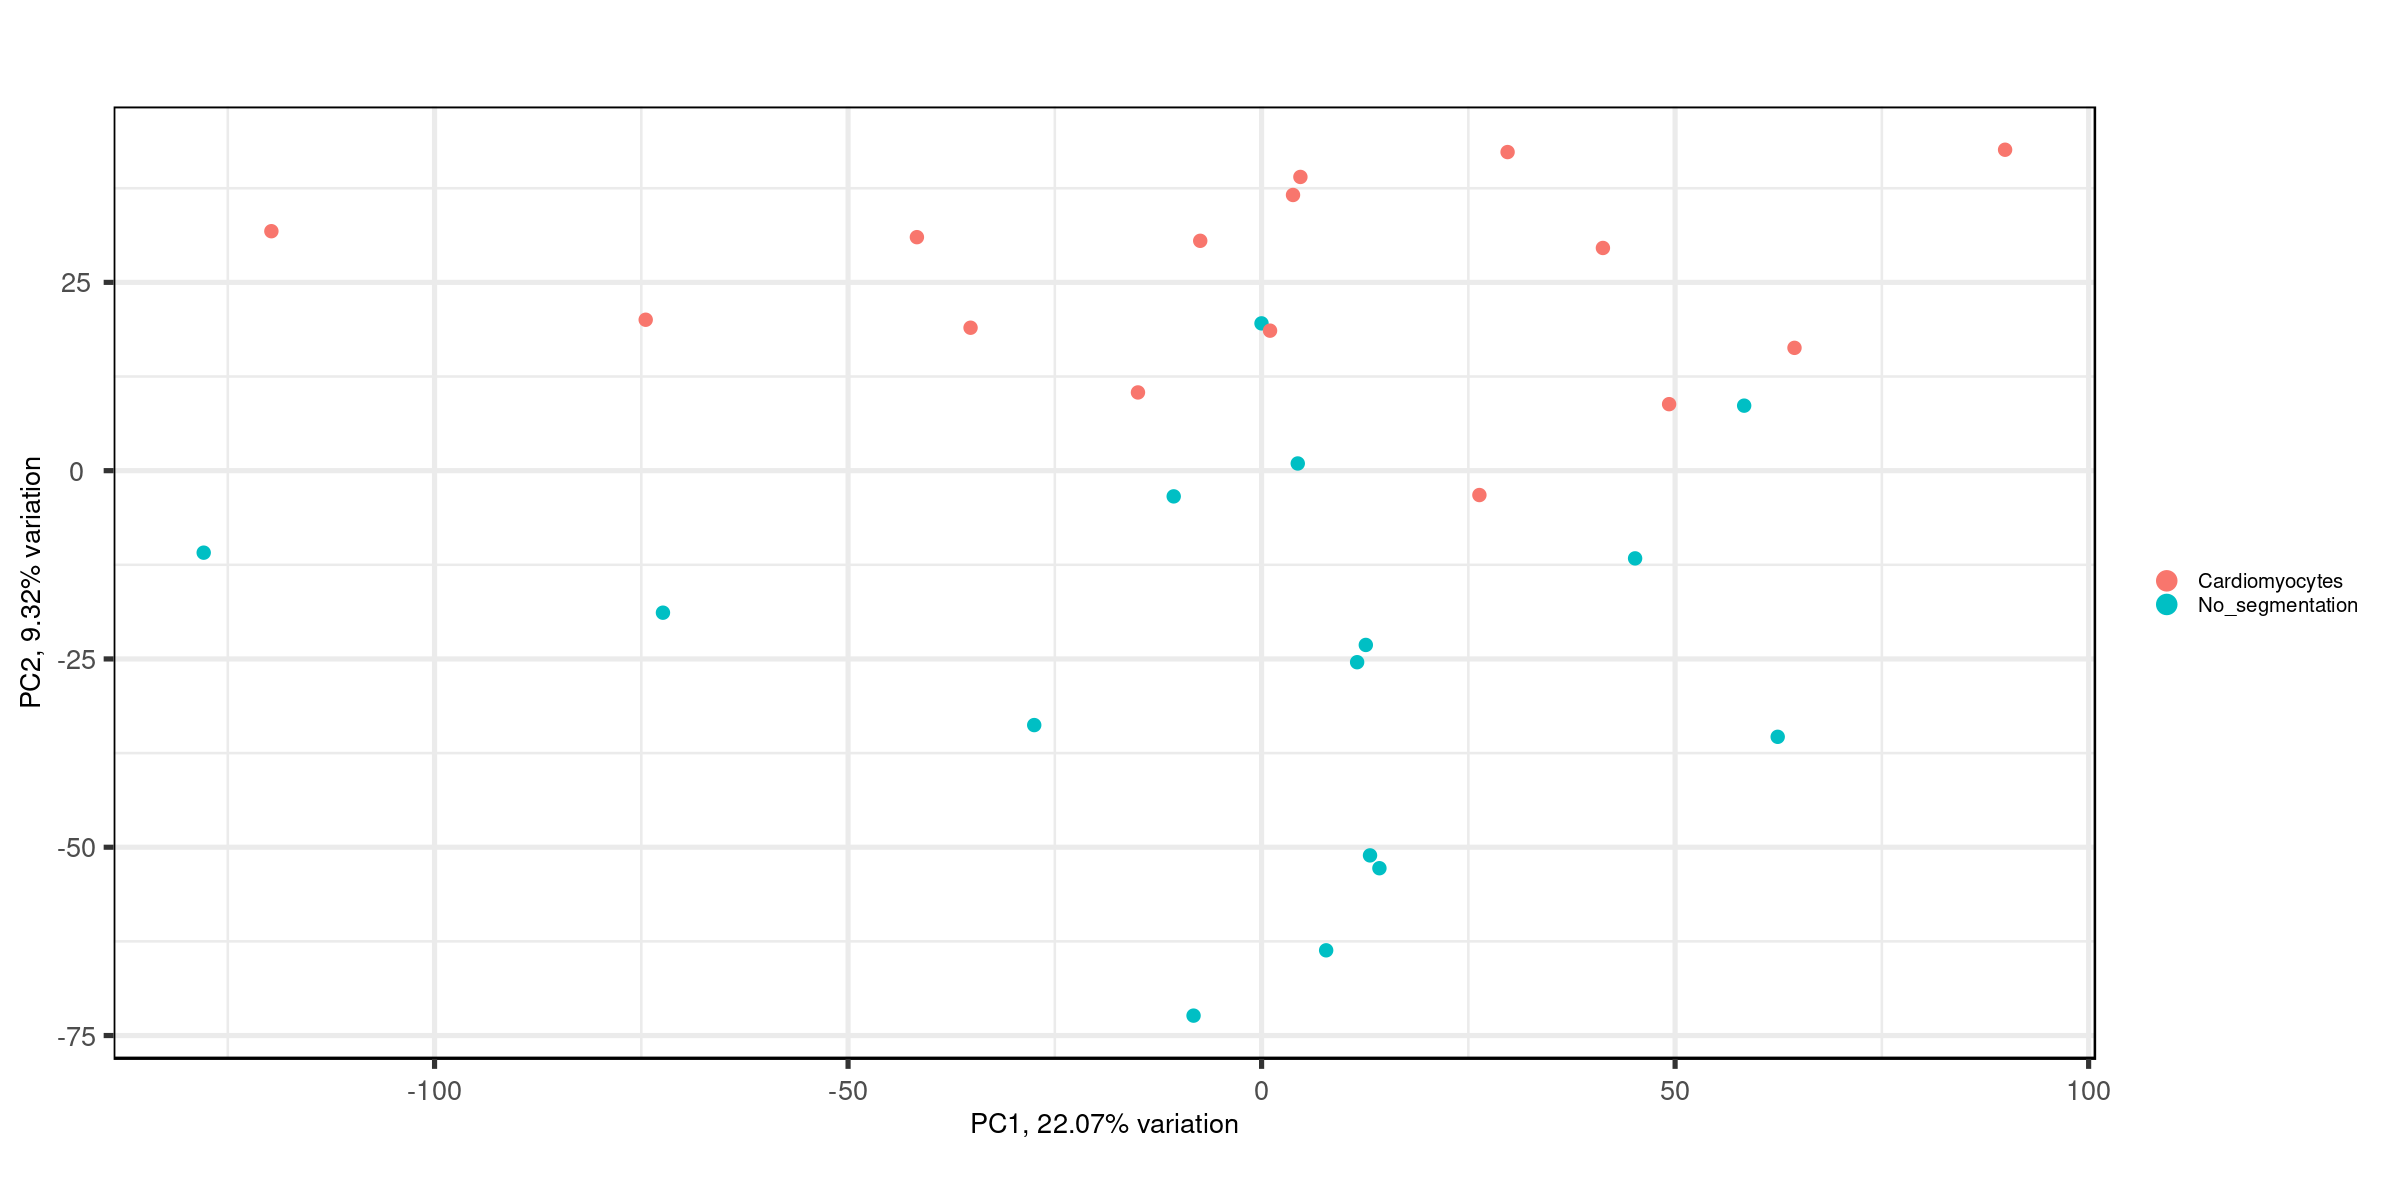

In [66]:
## PCA for cell types

par(mfrow=c(2,2))
for(i in 1:length(e.list)){
    fig <- biplot(pca.list[[i]], lab="", 
           colby =COI,
           legendPosition = "right",
                 # title=pca_title[i]
                  #,shape="TMA.block"
                 )
    print(fig)
    
}

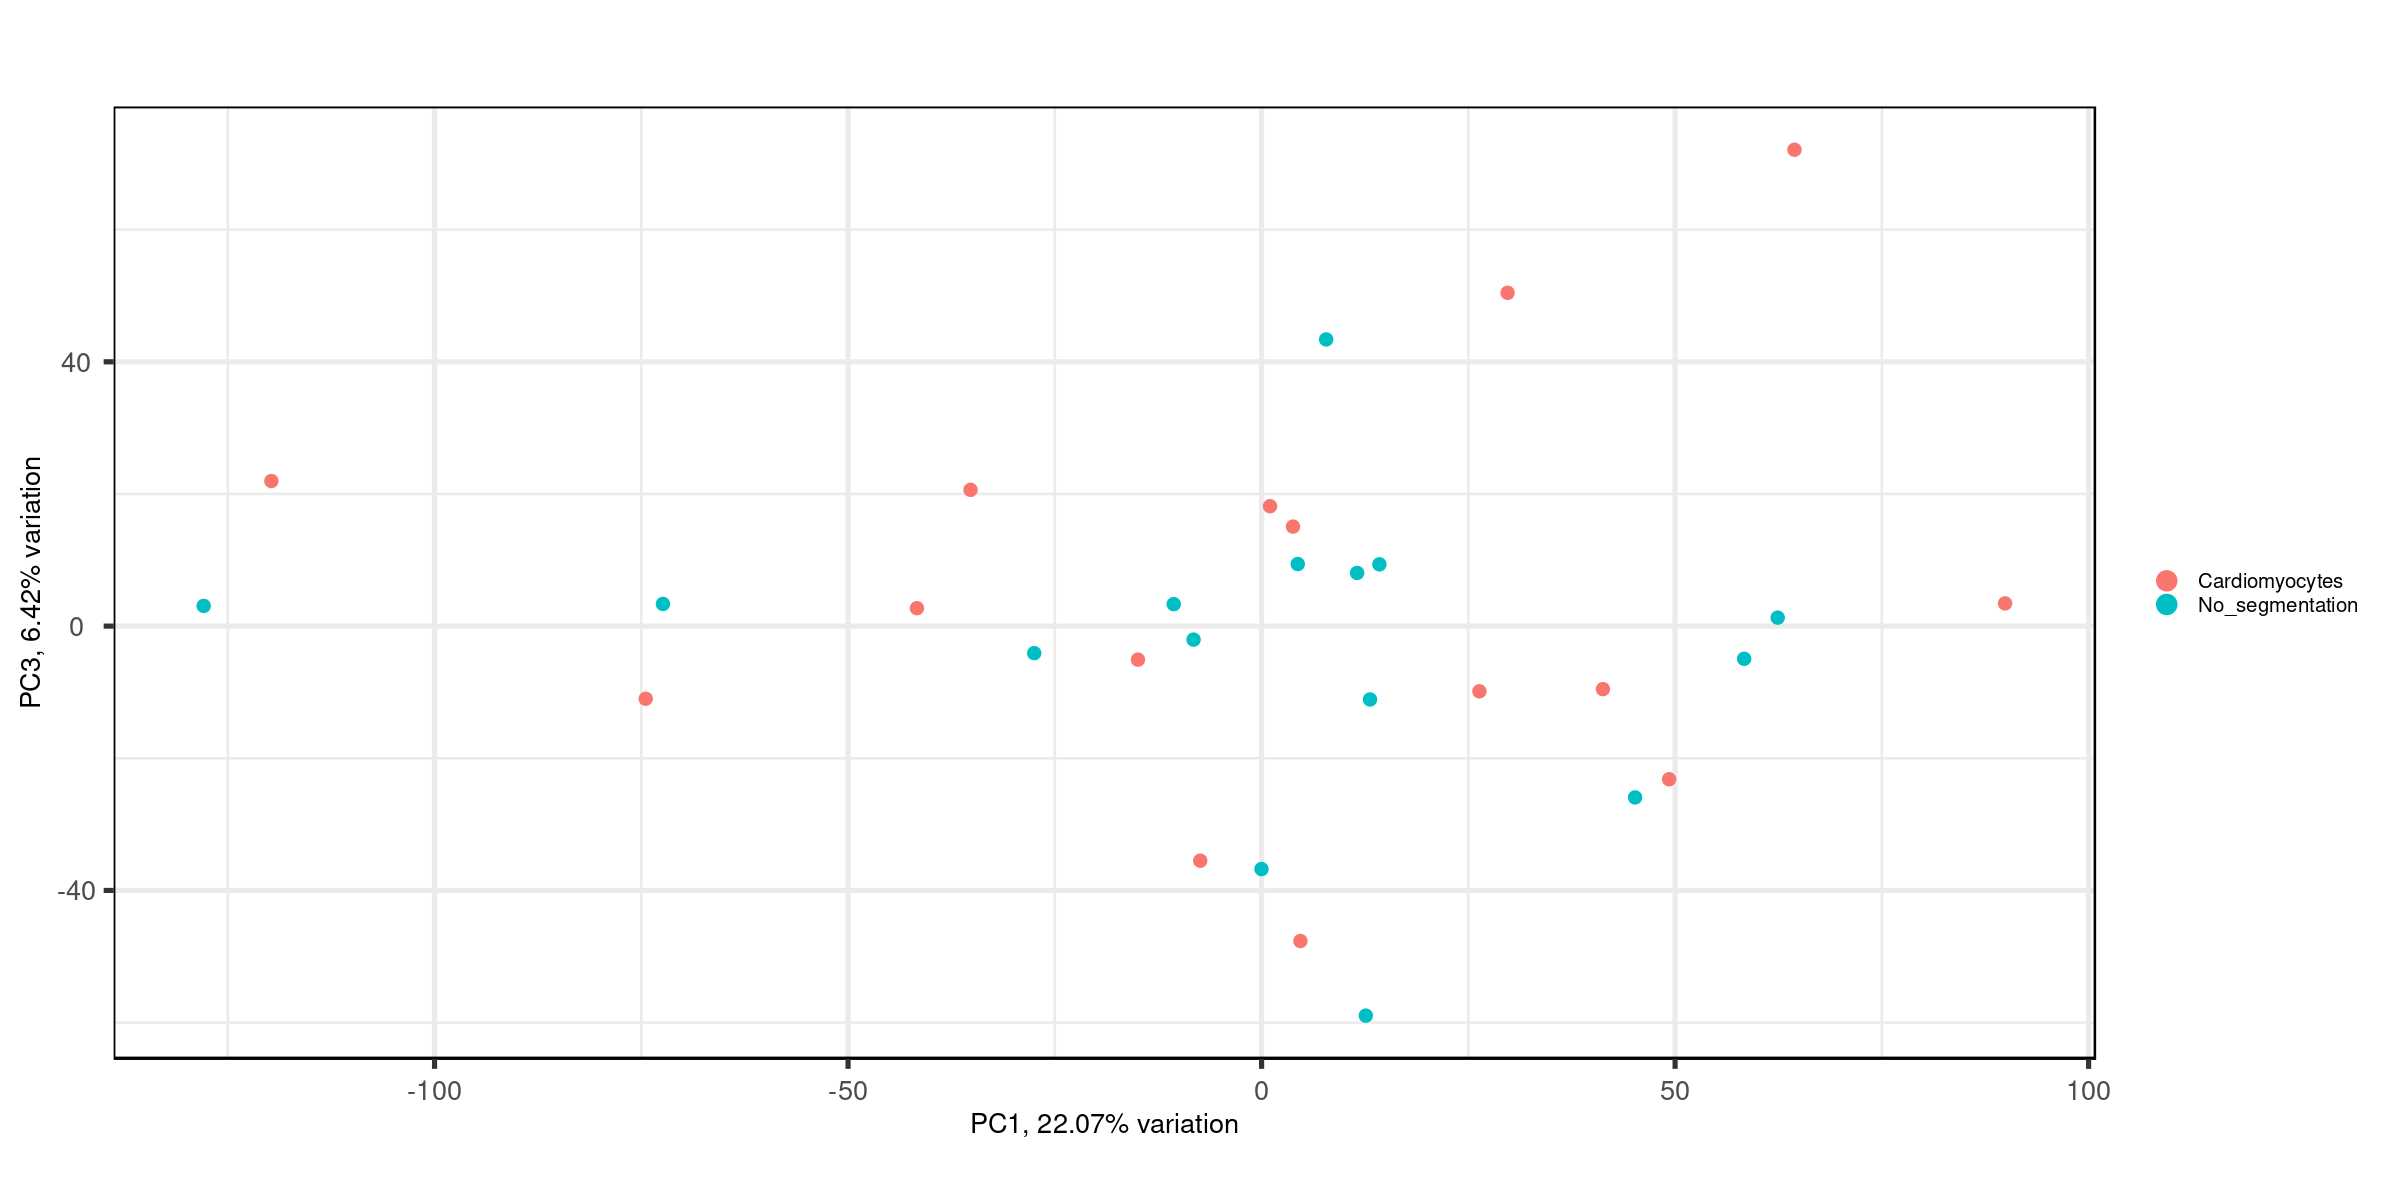

In [67]:
## PCA for cell types

par(mfrow=c(2,2))
for(i in 1:length(e.list)){
    fig <- biplot(pca.list[[i]], lab="", 
                  x = "PC1", y = "PC3",
           colby =COI,
           legendPosition = "right",
                 # title=pca_title[i]
                  #,shape="TMA.block"
                 )
    print(fig)
    
}

Coordinate system already present. Adding new coordinate system, which will replace the existing one.
Coordinate system already present. Adding new coordinate system, which will replace the existing one.
Coordinate system already present. Adding new coordinate system, which will replace the existing one.
Coordinate system already present. Adding new coordinate system, which will replace the existing one.
Coordinate system already present. Adding new coordinate system, which will replace the existing one.
Coordinate system already present. Adding new coordinate system, which will replace the existing one.
Coordinate system already present. Adding new coordinate system, which will replace the existing one.
Coordinate system already present. Adding new coordinate system, which will replace the existing one.
Coordinate system already present. Adding new coordinate system, which will replace the existing one.
Coordinate system already present. Adding new coordinate system, which will replac

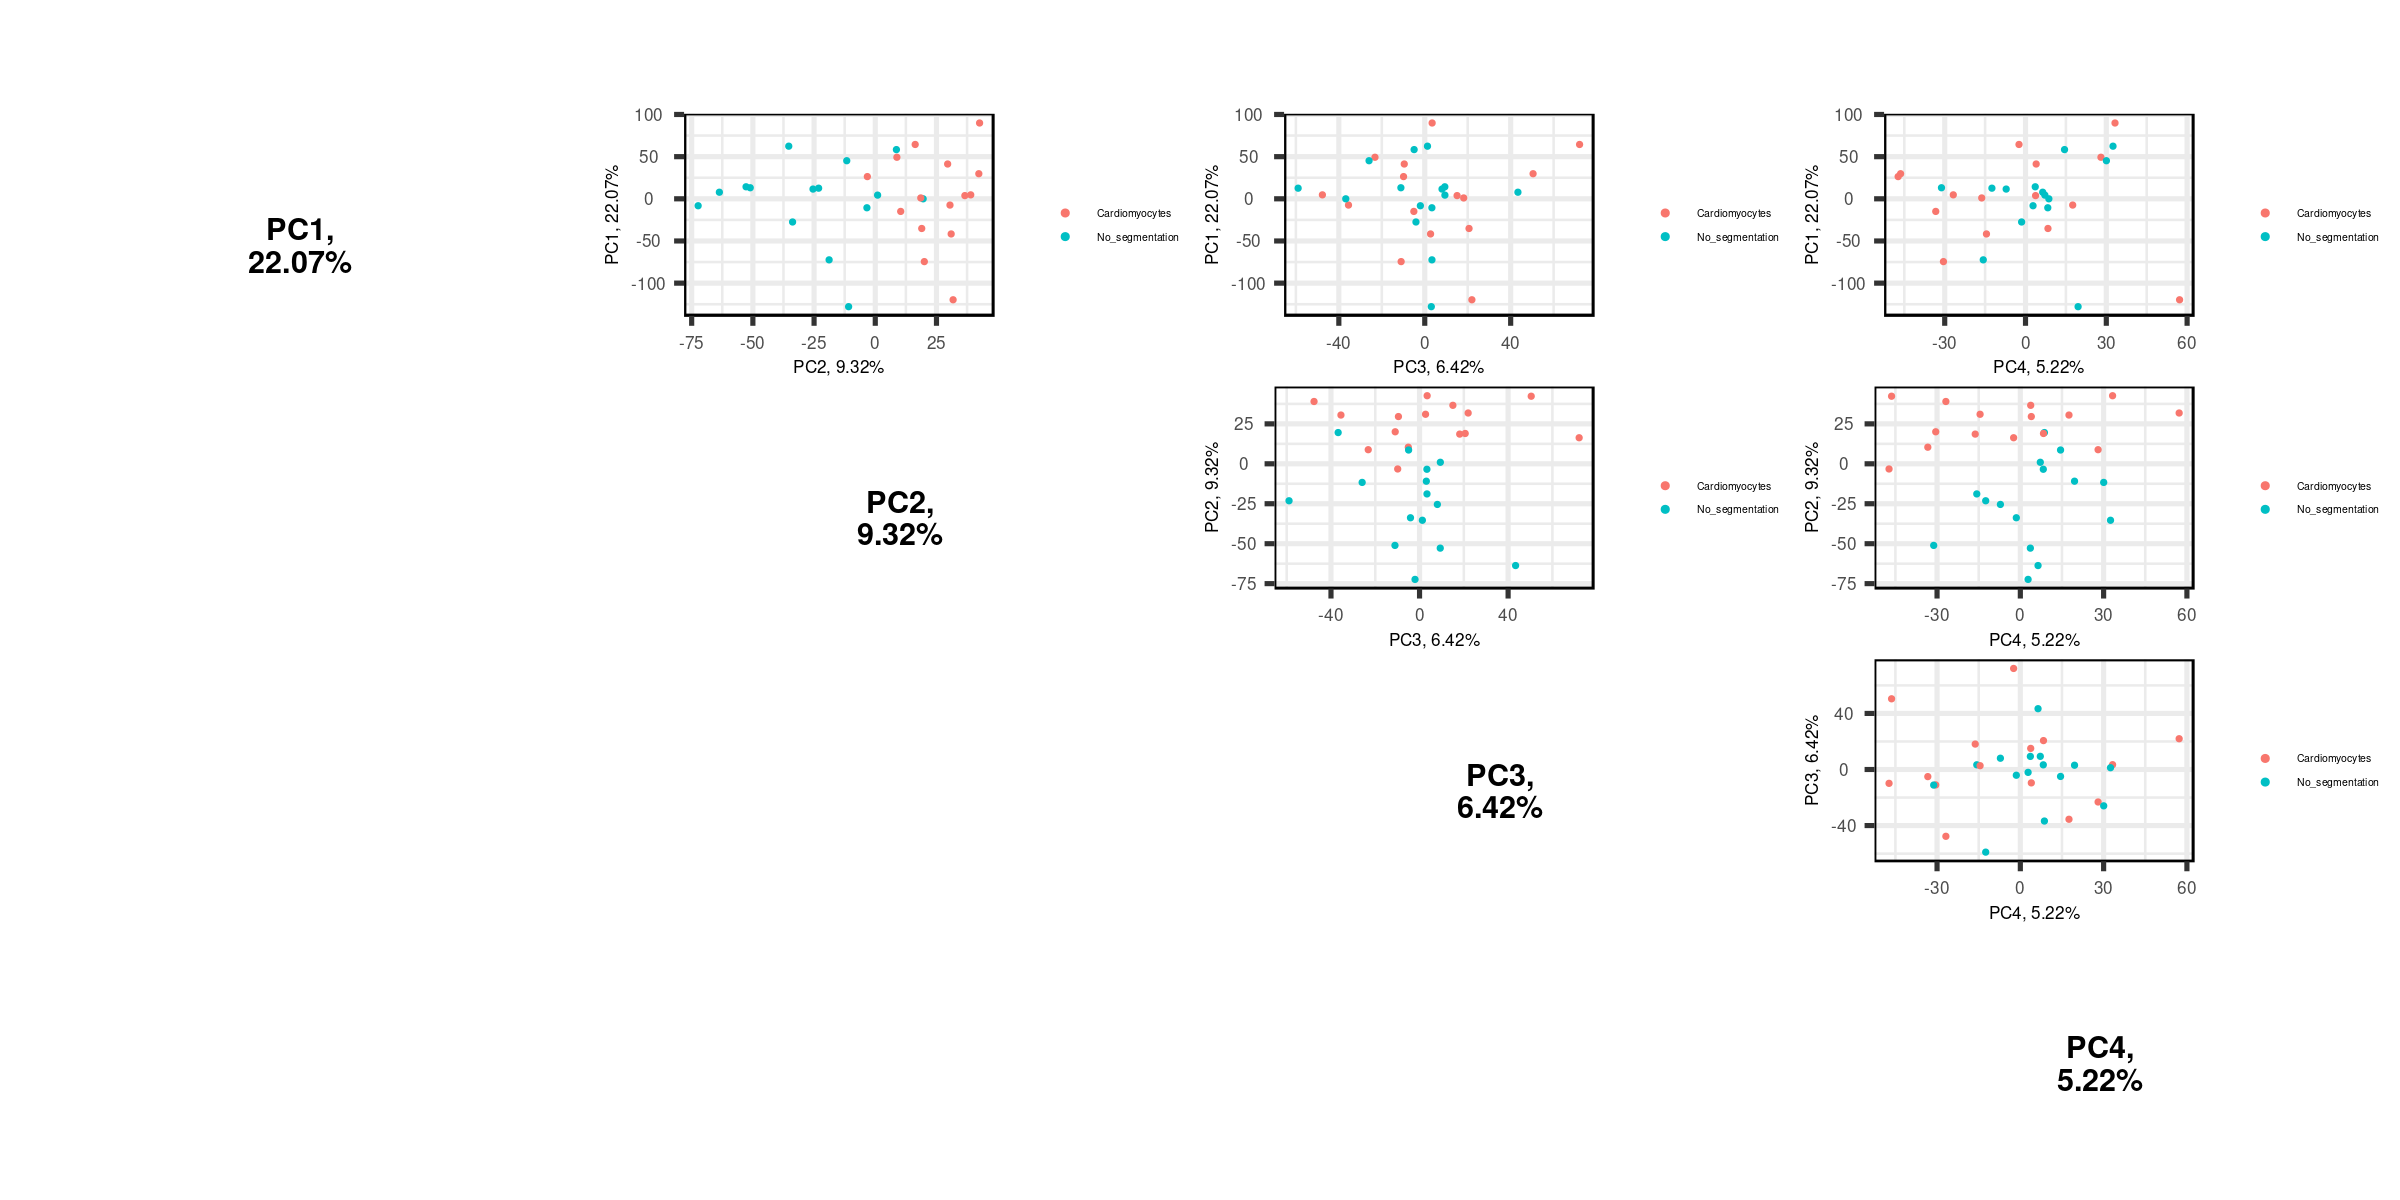

In [68]:
## PCA for cell types

par(mfrow=c(2,2))
for(i in 1:length(e.list)){
    fig <- pairsplot(pca.list[[i]] 
           , components = getComponents(pca.list[[i]] , seq_len(4))
           , lab="", 
           colby =COI,
           legendPosition = "right",
                 # title=pca_title[i]
                  #,shape="TMA.block"
                 )
    print(fig)
    
}

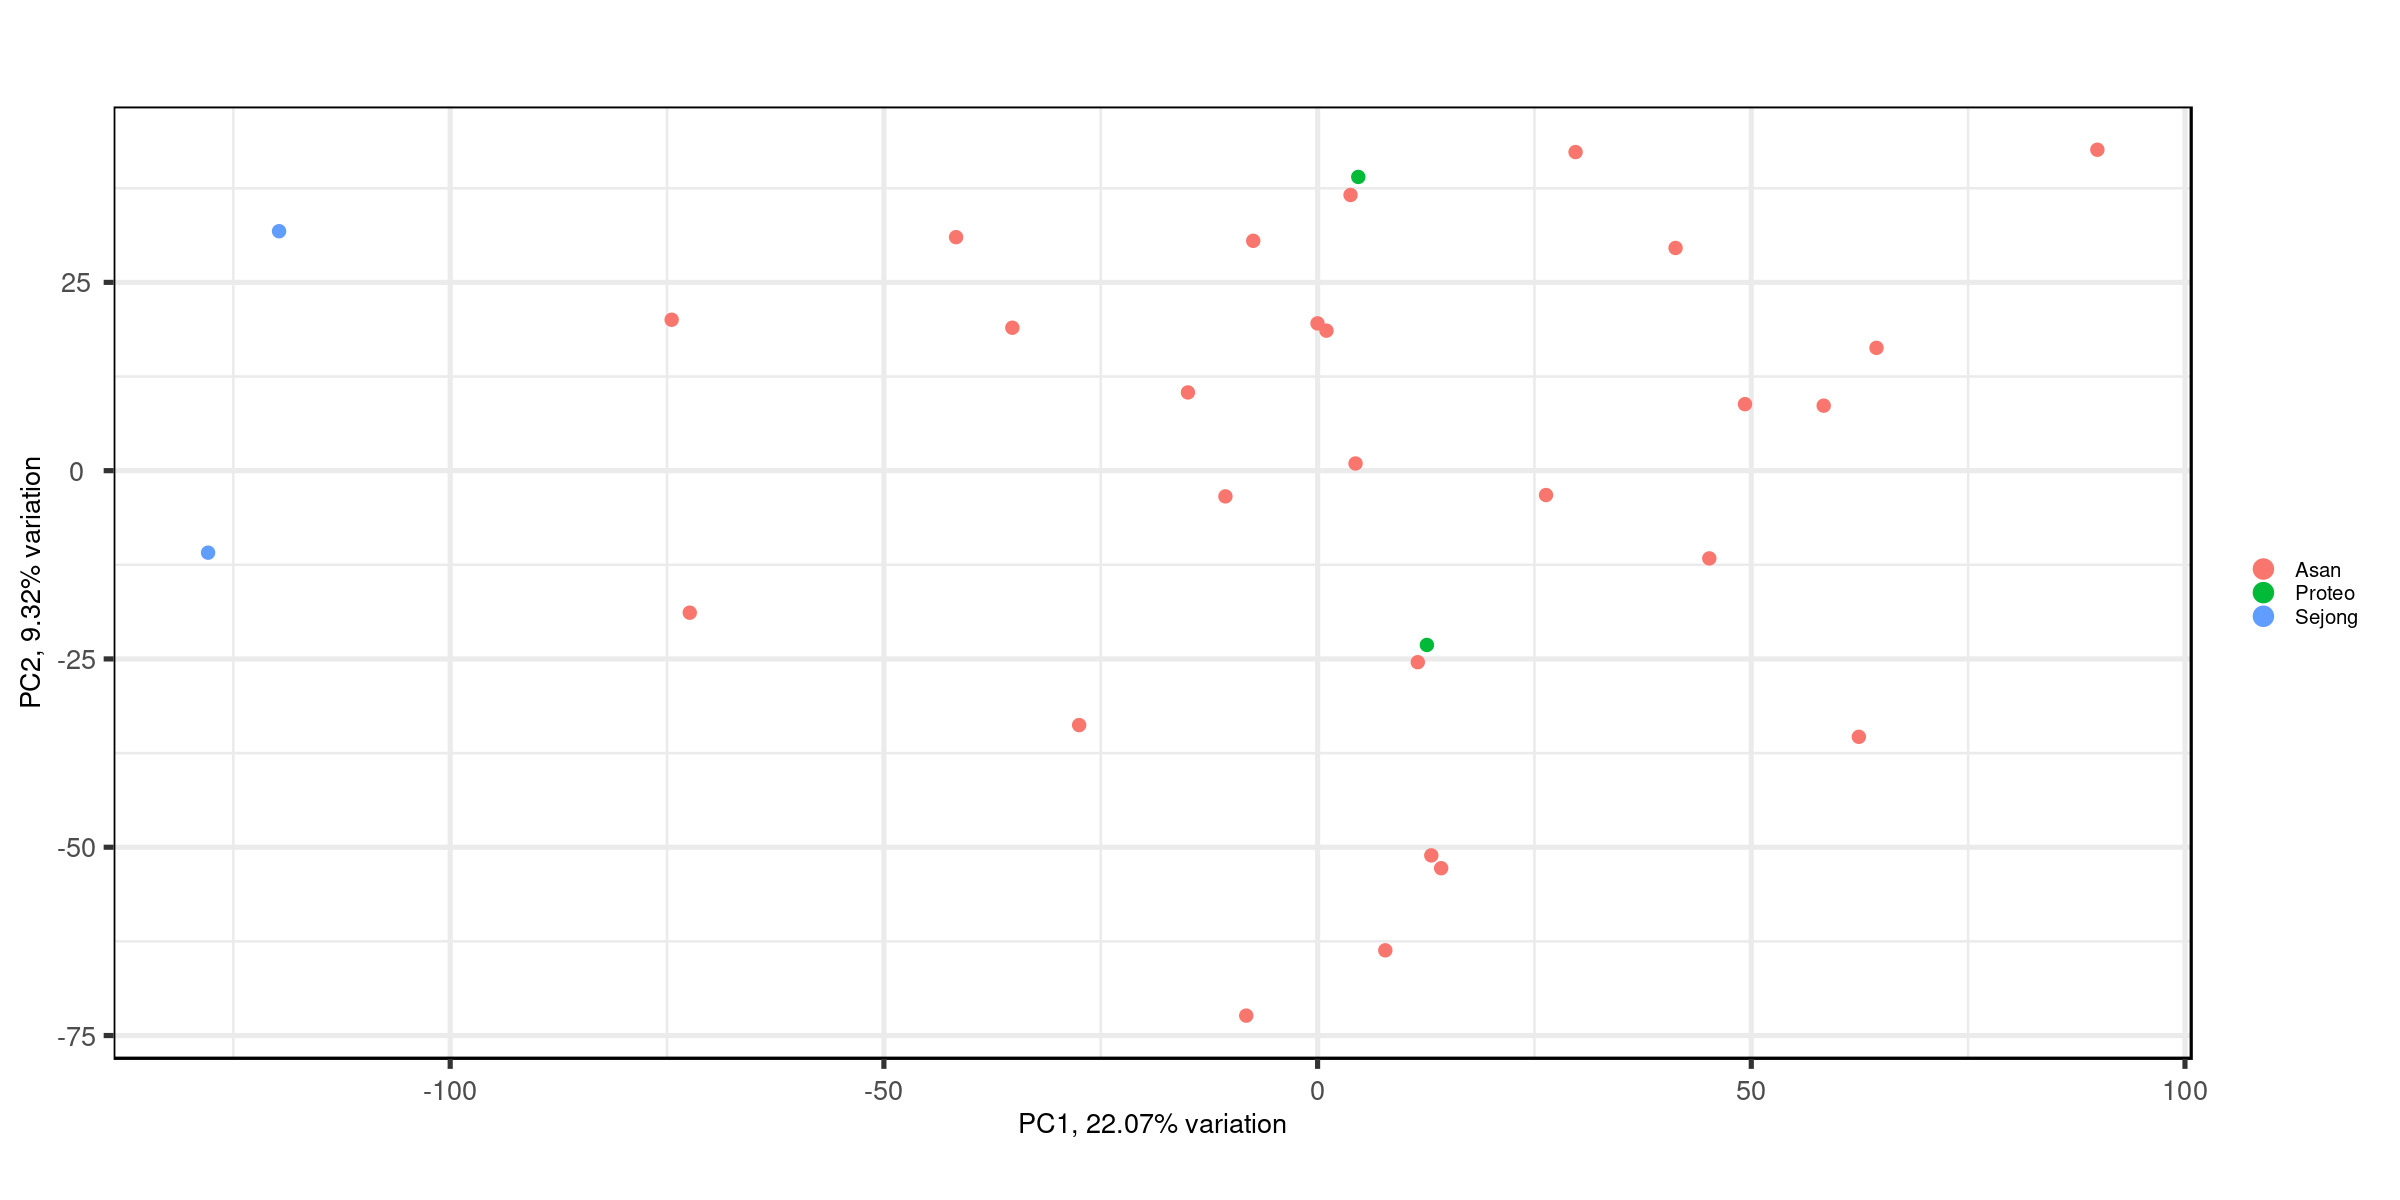

In [69]:
## PCA for Institute

for(i in 1:length(e.list)){
    fig <- biplot(pca.list[[i]], lab="",
           colby = "Institute",
           legendPosition = "right",
                 # title=pca_title[i]
                 )
    print(fig)
}

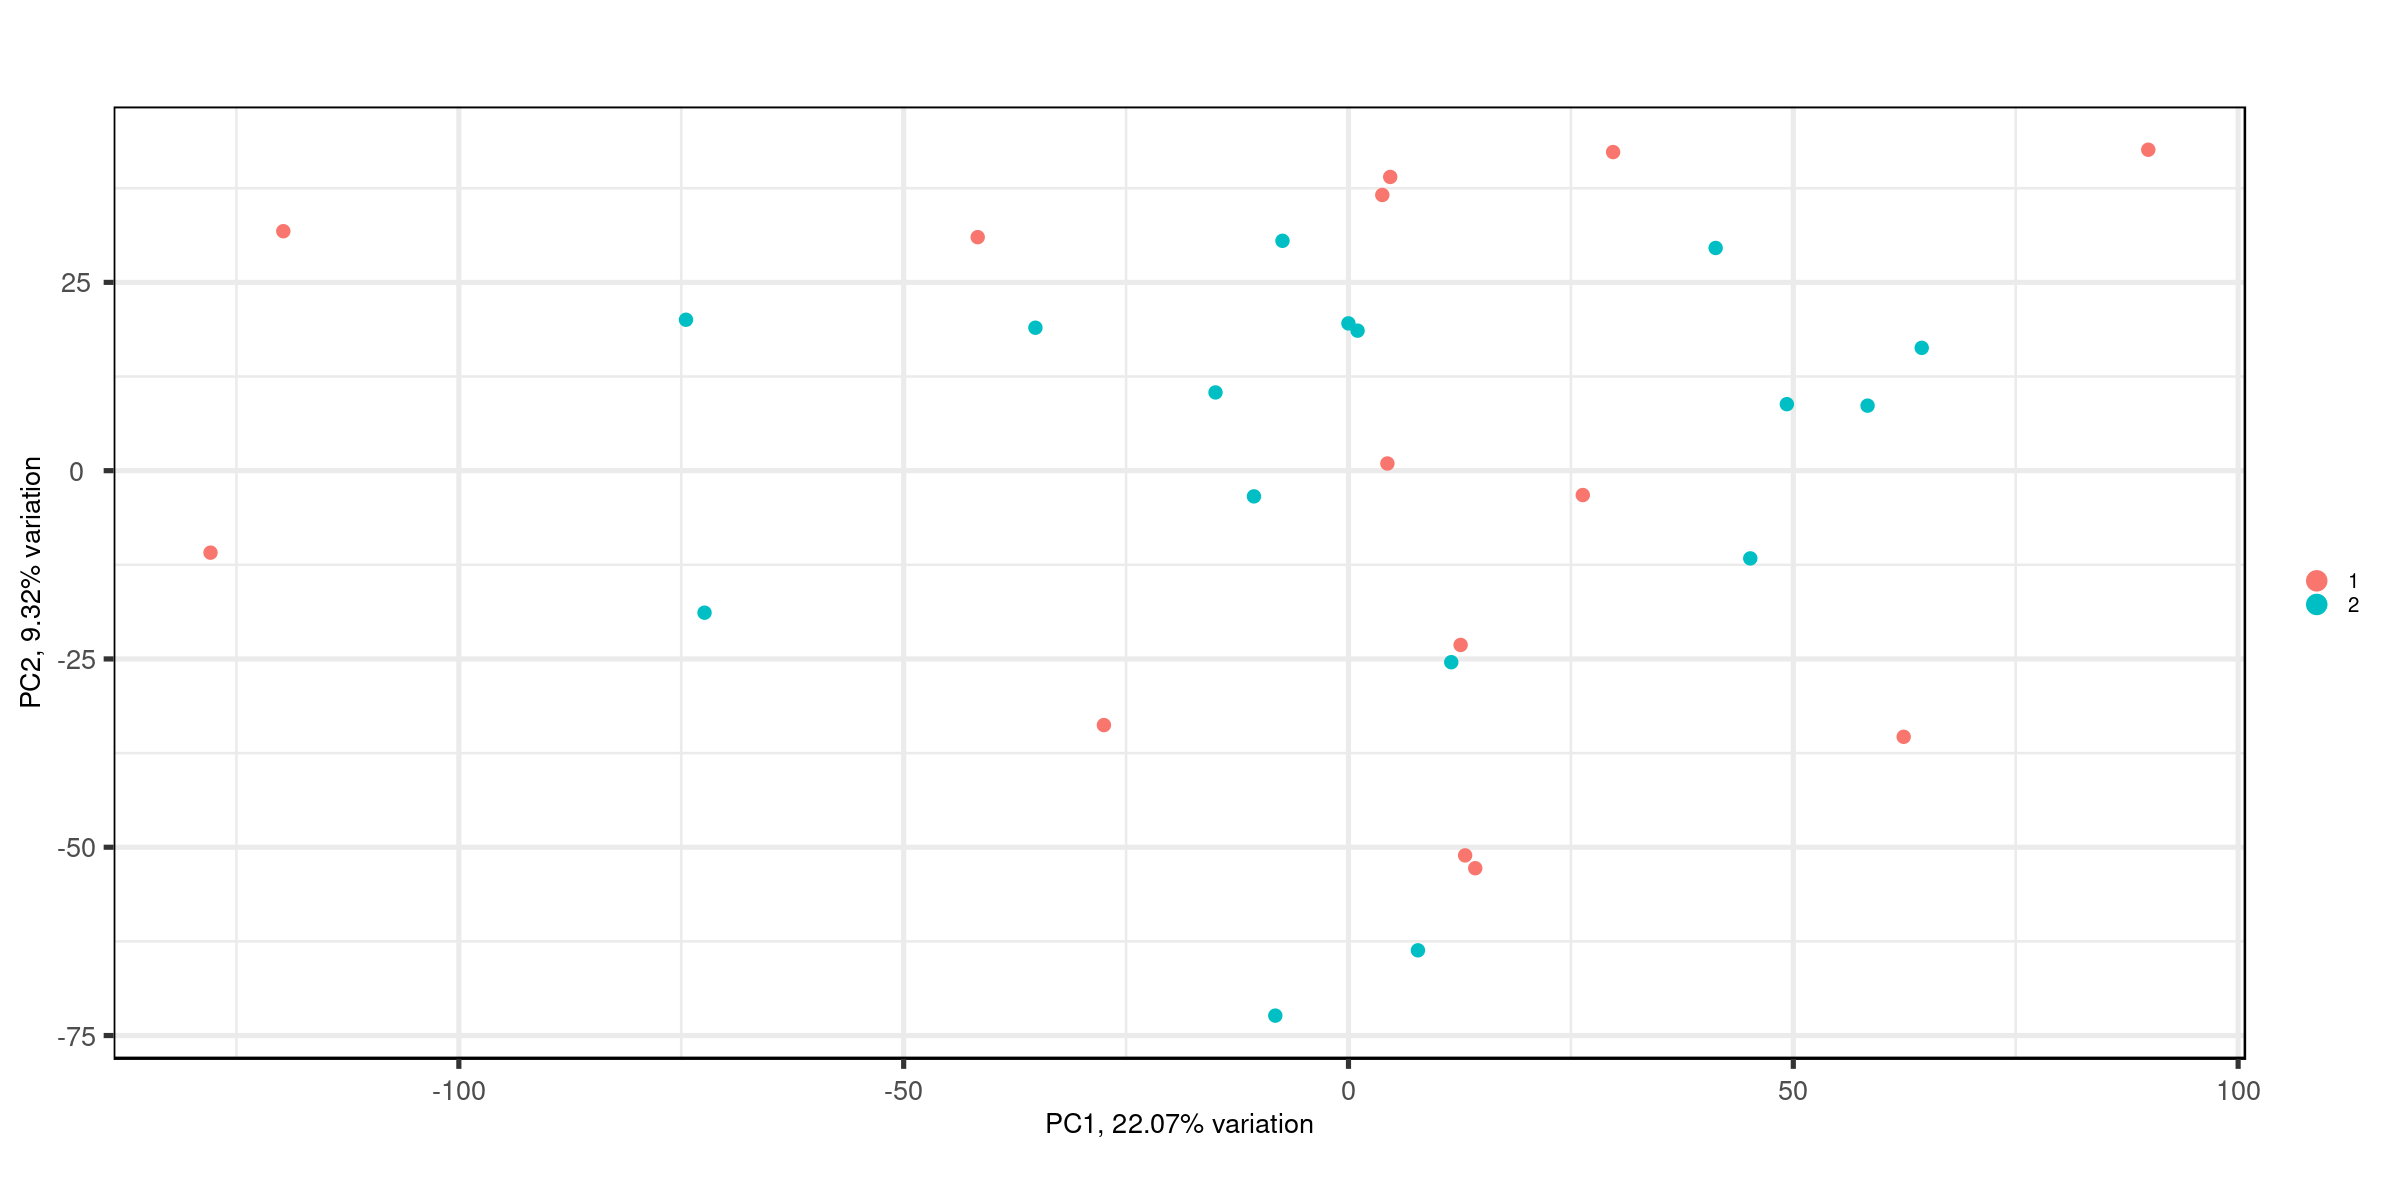

In [70]:
## PCA for blocks


for(i in 1:length(e.list)){
    fig <- biplot(pca.list[[i]], lab="",
           colby = "TMA.block",
           legendPosition = "right",
                 # title=pca_title[i]
                 )
    print(fig)
}

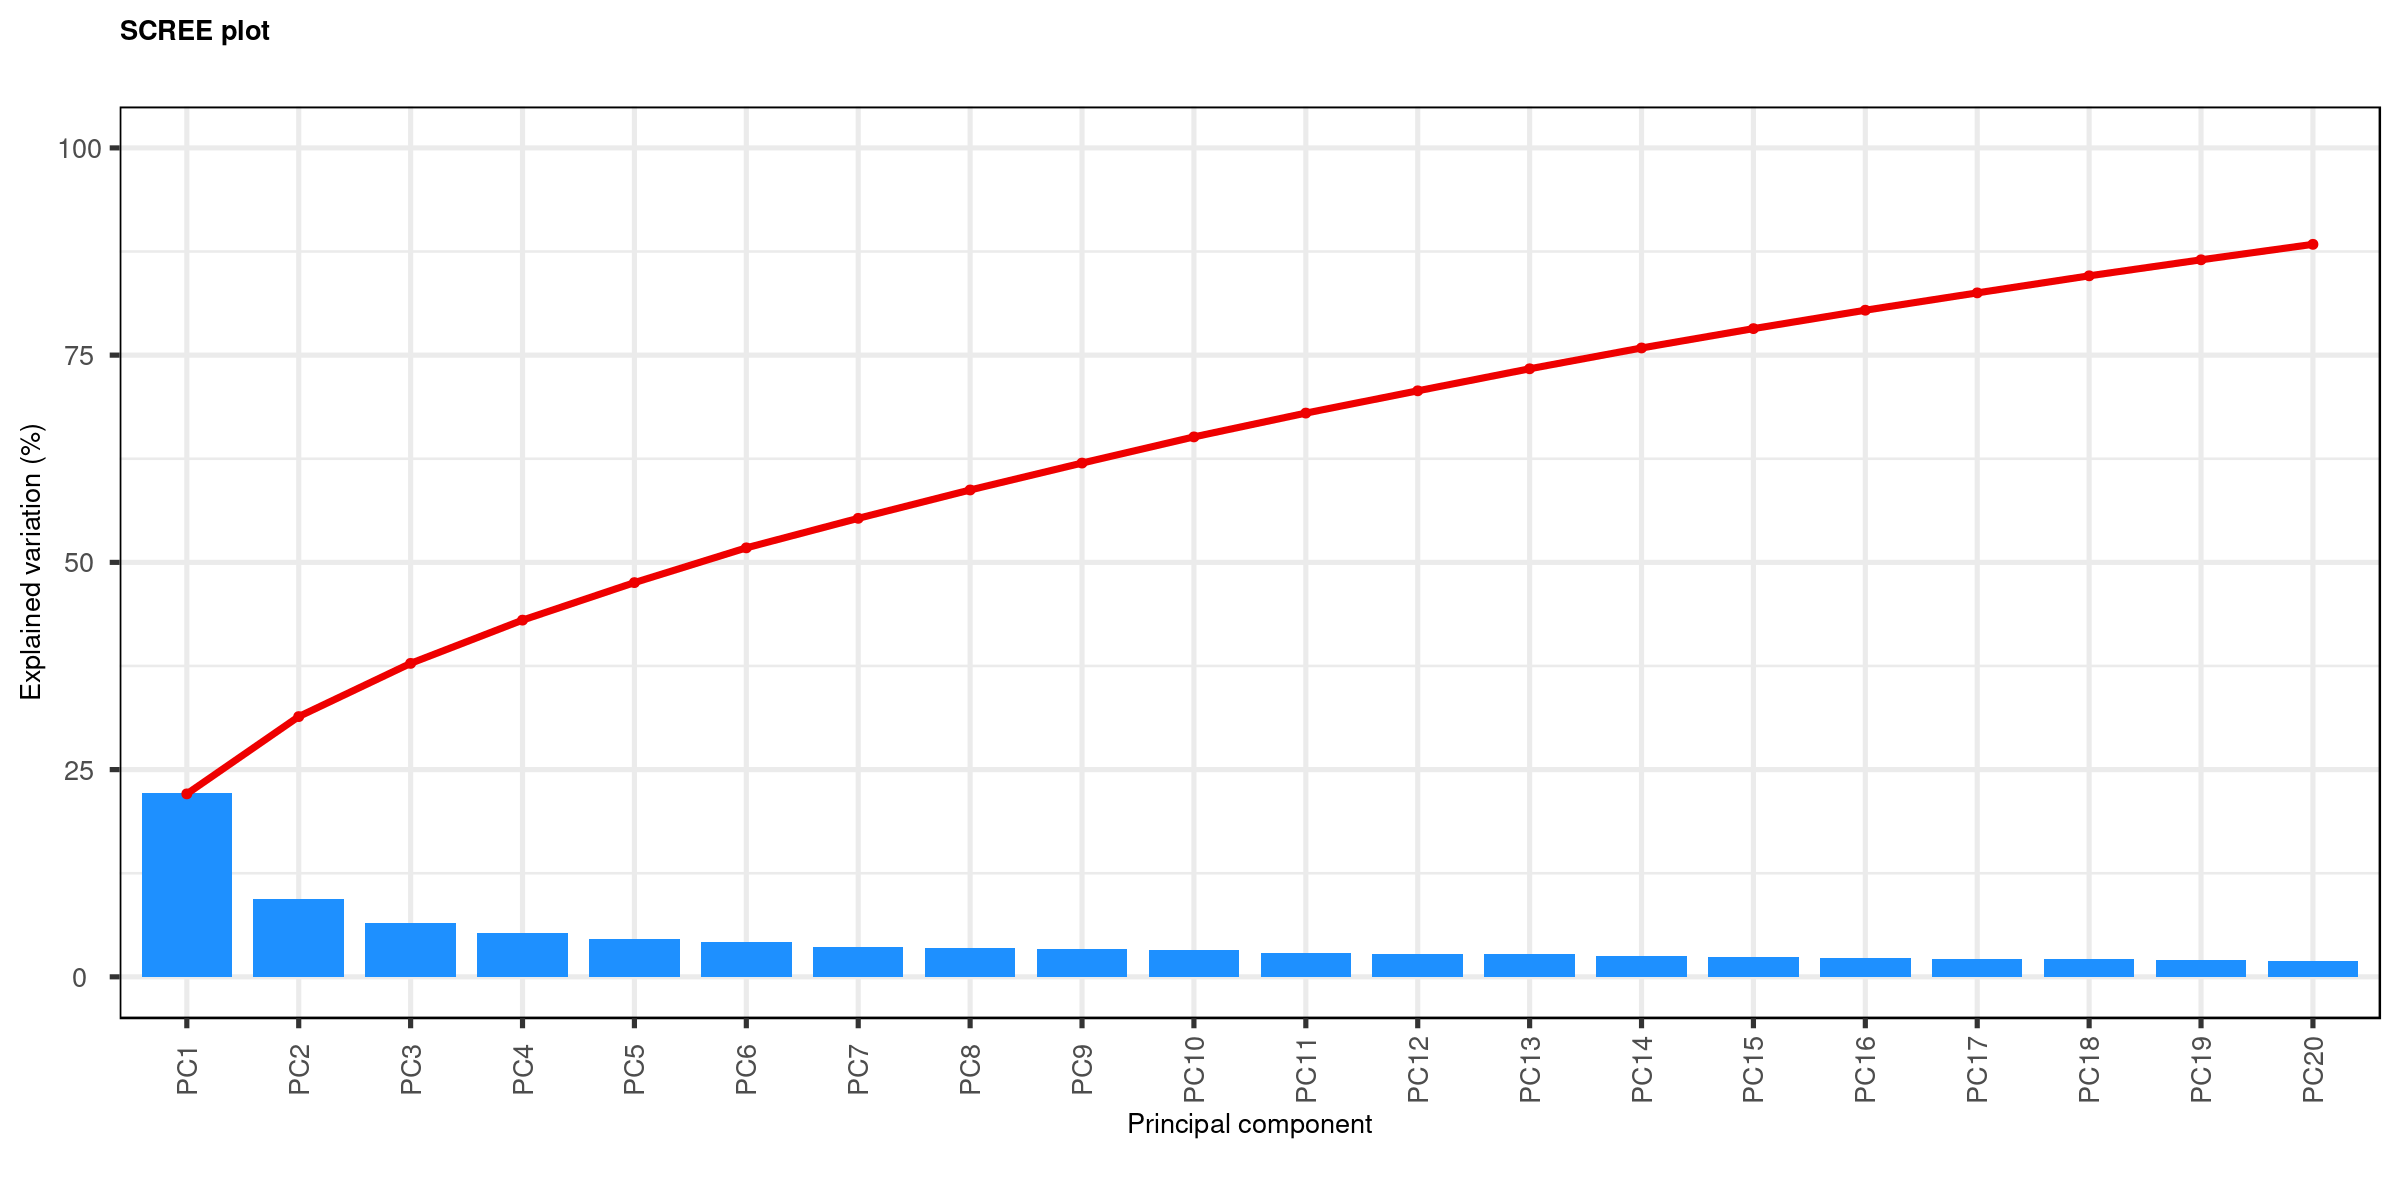

In [71]:
## PCA for blocks


for(i in 1:length(e.list)){
    fig <- screeplot(pca.list[[i]],
                     components = getComponents(pca.list[[i]], c(1:20)),
                 # title=pca_title[i]
                    )
    print(fig)
}

# OUTLIER

## Outlier removal according to PCA plot 

In [72]:
pca2_tmp<-pca.list[[1]]$rotated[c(1,2)]

pcaplot_outlier <-rownames(pca2_tmp)[pca2_tmp$PC1<(-100)]

pcaplot_outlier

[1] "PR79_1_WTA...040...Trp"      "PR79_1_WTA...056...Full.ROI"

In [73]:
dim(output_e3)

[1] 12800    30

In [74]:
Y4="output_p3"
Z4="output_e3"

if (grid_set == "N") {
    output_p4 = get(Y4)
    output_e4 = get(Z4)
    } else {
    if (grepl("pcaplot", outlier_set)==TRUE) {
        X4=outlier_set
        } else {
        grid_set = get(outlier_set)
        sp_gridflag <-names(grid_set$flag[grid_set$flag==FALSE])
        X4="sp_gridflag"
        }
    remove_sample(X4,Y4,Z4)
    output_p4 = get(paste(Y4, "_rm_", X4, sep=""))
    output_e4 = get(paste(Z4, "_rm_", X4, sep=""))
    }

[1] "the samples in phenotype and expression data is identical: TRUE"
[1] "the file name of the phenotype data is output_p3_rm_pcaplot_outlier"
[1] "and the sample count in phenotype data is 28"
[1] "the file name of the expression data is output_e3_rm_pcaplot_outlier"
[1] "and the sample count in expression data is 28"


# FINAL DATA INPUT

In [75]:
d0 <- DGEList(output_e4)
m <- output_p4
e <- output_e4
f <- fdata_nodup
d0$genes <- f ## Add annotation in "genes"

### Add features of samples in "samples"

In [76]:
d0$samples$celltype <- m$celltype

PID <- as.factor(m$PID)
d0$samples$PID <- PID


condition <- factor(m[[COI]])
d0$samples$condition <- condition


# Ds <- as.factor(m$Clinical_phenotype_2nd)
# d0$samples$Ds <- Ds

# levels(condition) <- c("Non_Endstage", "End_stage")
m <- cbind(m, condition)

### Add normalization factors

In [77]:
d1 <- calcNormFactors(d0, method="upperquartile")

# Gene expression analysis - DREAM

## Top ranked gene expression

In [79]:
param = SnowParam(NoCore, "SOCK", progressbar=TRUE)

In [80]:
form

~condition + (1 | ID.block.core) + (1 | Institute)

In [81]:
#### apply to our data 4#### met_Trp_hcmp_ctrl$Clinical_phenotype_2nd
# The variable to be tested must be a fixed effect
# estimate weights using linear mixed model of dream
vobjDream = voomWithDreamWeights(d1, form, m, BPPARAM=param)

Memory usage to store result: >40.4 Mb

Dividing work into 112 chunks...

iteration: 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112



Total:46 s



In [82]:
options(repr.plot.width=10, repr.plot.height=10)


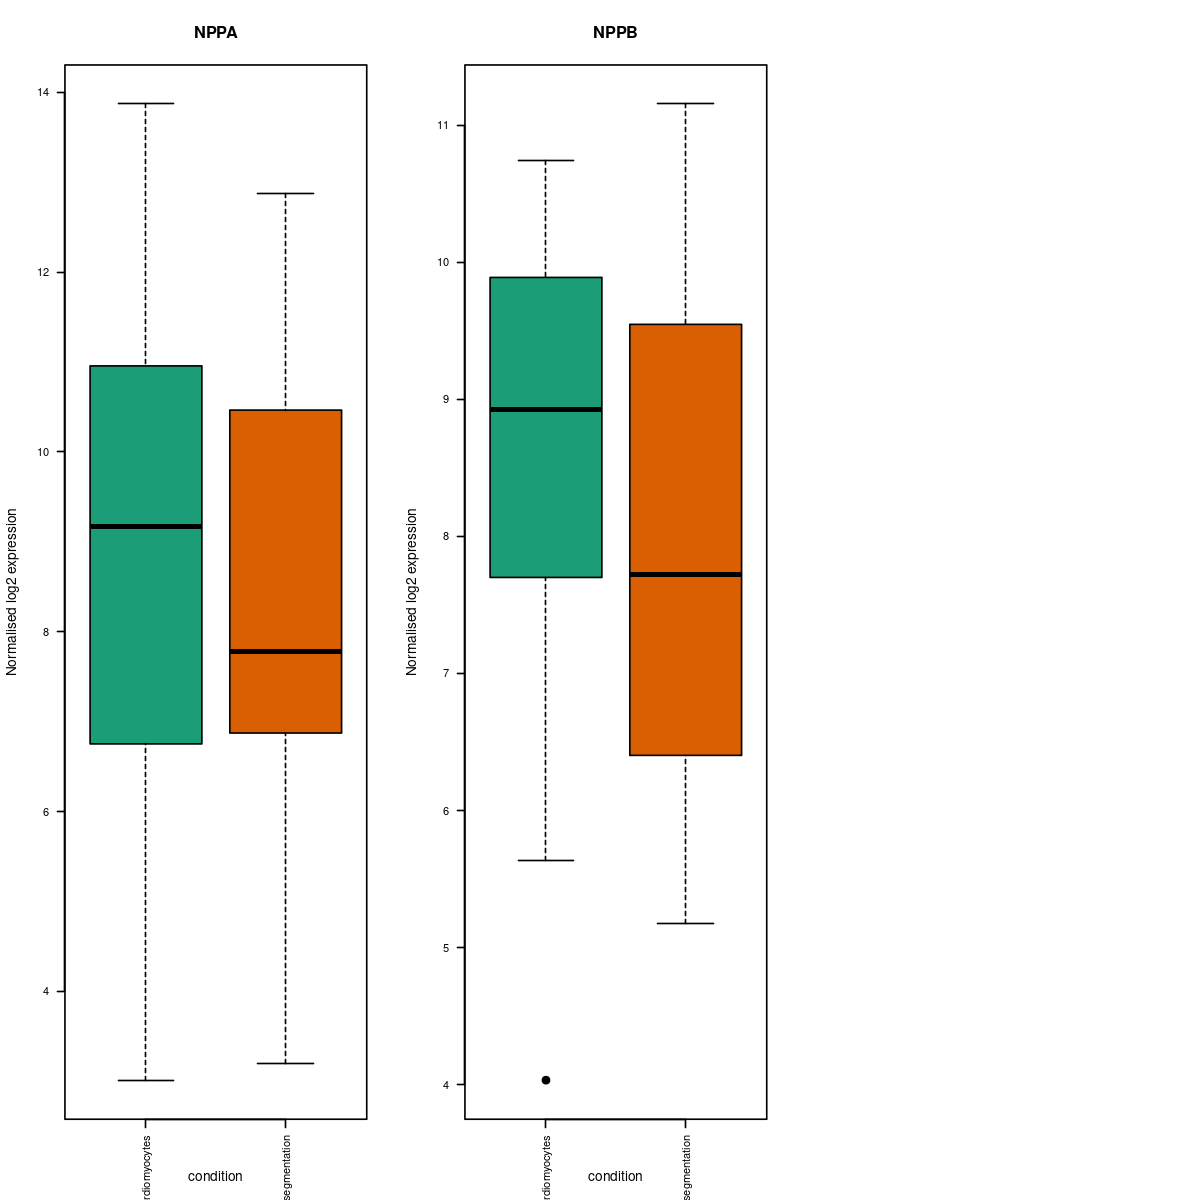

In [83]:
nice.col <- brewer.pal(6,name="Dark2")

par(mfrow=c(1,3))
boxplot(vobjDream$E["NPPA",]~condition,vertical=TRUE,las=2,cex.axis=0.8,pch=16,cex=1.3,col=nice.col,method="jitter",ylab="Normalised log2 expression",main="NPPA") 
boxplot(vobjDream$E["NPPB",]~condition,vertical=TRUE,las=2,cex.axis=0.8,pch=16,cex=1.3,col=nice.col,method="jitter",ylab="Normalised log2 expression",main="NPPB")
# boxplot(vobjDream$E["PECAM1",]~celltype,vertical=TRUE,las=2,cex.axis=0.8,pch=16,cex=1.3,col=nice.col,method="jitter",ylab="Normalised log2 expression",main="PECAM1") 



## Differential expression analysis

## Make Contrast Matrix using condition 

In [84]:
makecontrastasroutine

[1] "Y"

In [85]:
if (makecontrastasroutine == "Y") {
    if (length(levels(condition)) == 2) {
    contrast = c(paste0("condition", levels(condition)[1], " - ", "condition", levels(condition)[2]))
    } else if (length(levels(condition)) == 3) {
    contrast = c(paste0("condition", levels(condition)[2], " - ", "condition", levels(condition)[1]),
              paste0("condition", levels(condition)[3], " - ", "condition", levels(condition)[1]))
    } else if (length(levels(condition)) == 4) {
    contrast = c(paste0("condition", levels(condition)[2], " - ", "condition", levels(condition)[1]),
              paste0("condition", levels(condition)[3], " - ", "condition", levels(condition)[1]),
              paste0("condition", levels(condition)[4], " - ", "condition", levels(condition)[1]))
    } else if (length(levels(condition)) == 5) {
    contrast = c(paste0("condition", levels(condition)[2], " - ", "condition", levels(condition)[1]),
                 paste0("condition", levels(condition)[3], " - ", "condition", levels(condition)[1]),
                 paste0("condition", levels(condition)[4], " - ", "condition", levels(condition)[1]),
                 paste0("condition", levels(condition)[5], " - ", "condition", levels(condition)[1]))
        }
    } else if (makecontrastasroutine == "Forclinicaldisease") {
    contrast = c(paste0("condition", levels(condition)[2], " - ", "condition", levels(condition)[1]),
              paste0("condition", levels(condition)[3], " - ", "condition", levels(condition)[1]),
              paste0("condition", levels(condition)[4], " - ", "condition", levels(condition)[1]),
              paste0("condition", levels(condition)[5], " - ", "condition", levels(condition)[1]),
              paste0("condition", levels(condition)[3], " - ", "condition", levels(condition)[5]))
    } else if (makecontrastasroutine == "celltype_comwith_othercells") {
    contrast = c("conditionCMC-(conditionEC + conditionFB)/2"
                  , "conditionEC-(conditionCMC + conditionFB)/2"
                  , "conditionFB-(conditionEC + conditionCMC)/2"
                 , "conditionFB-conditionEC"
                 , "conditionEC-conditionCMC"
                 , "conditionFB-conditionCMC"
                 , "conditionCMC-conditionNo_Seg"
                 , "conditionEC-conditionNo_Seg"
                 , "conditionFB-conditionNo_Seg")
    } else {print("Decide Contrast for differential analysis")}


In [86]:
contrast

[1] "conditionCardiomyocytes - conditionNo_segmentation"

In [87]:
L = makeContrastsDream(form_cont, m, 
                       contrasts = contrast)


### Fitting linear mixed model

In [88]:
## Small-sample method
if (KRanaly == "Y"){
    fit = dream(vobjDream, form_cont, m, L, ddf="Kenward-Roger", BPPARAM=param)
    } else {
    fit = dream(vobjDream, form_cont, m, L, BPPARAM=param)
    }

fit = eBayes(fit)

Dividing work into 112 chunks...

iteration: 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112



Total:172 s



In [89]:
save.image(file = file.path(getwd(), paste("Spatialanalysis", Analysis_name, "analysis.RData", sep="_")))



In [90]:
print(paste("Spatialanalysis", Analysis_name, "analysis.RData", sep="_"))

[1] "Spatialanalysis_SejongIn_Segment.id_FullROI_Y_cellselection_Y_Cardiomyocytes_No_segmentation_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_ID.block.core_Institute_KR_Y2023-06-22_analysis.RData"


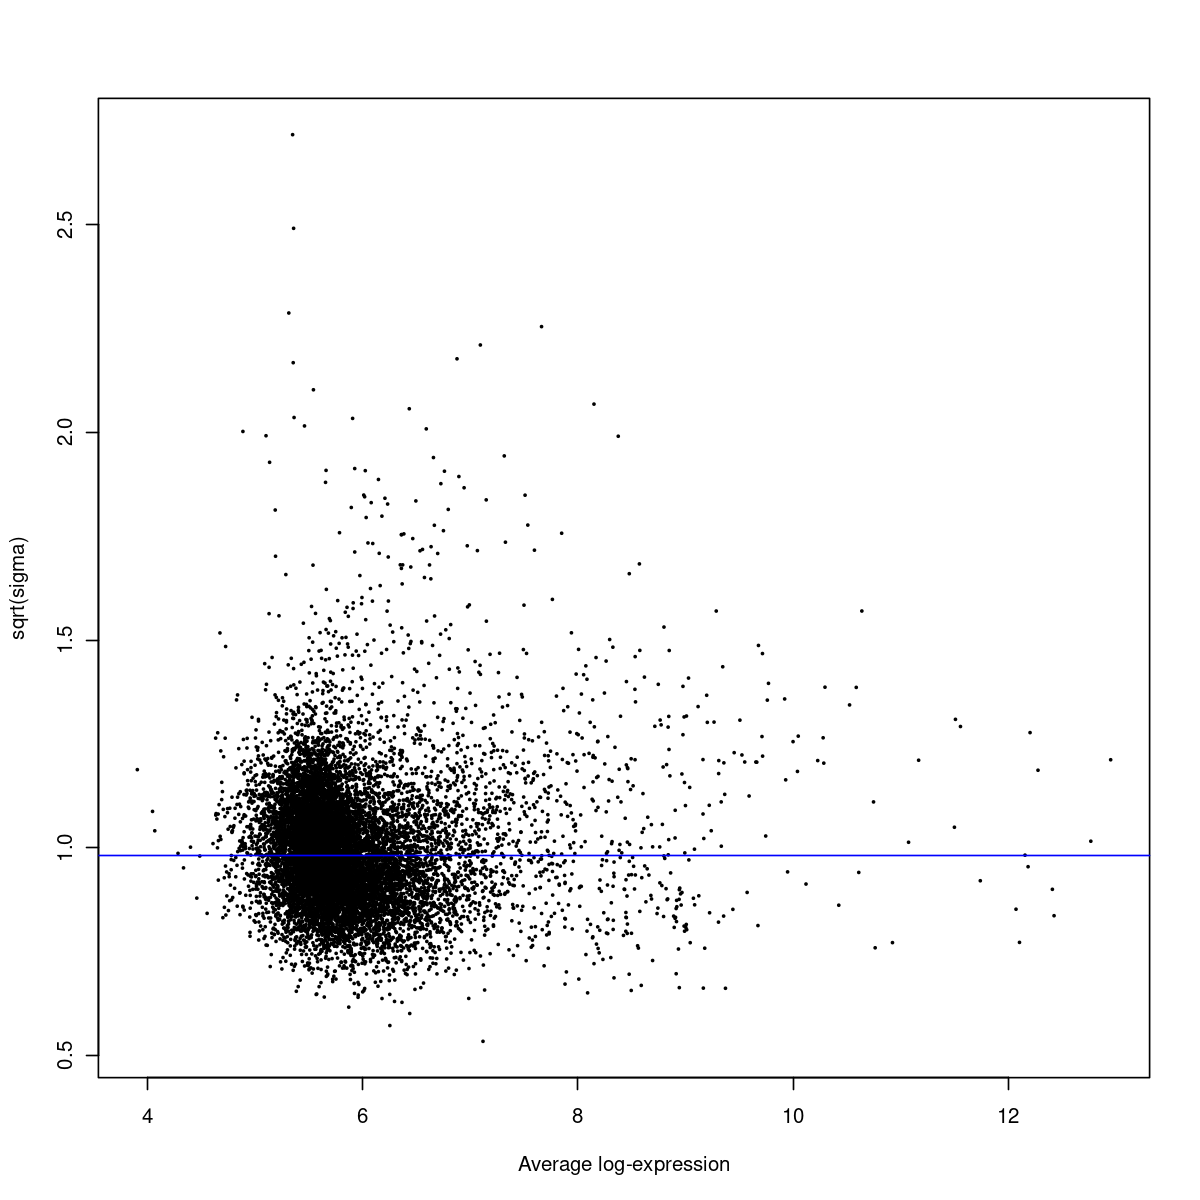

In [91]:
plotSA(fit)

## Figure 3B Examining  DE genes

In [92]:
summ.fit <- decideTests(fit)

In [93]:
summary(summ.fit)

       conditionCardiomyocytes - conditionNo_segmentation
Down                                                 1027
NotSig                                              10674
Up                                                   1099
       conditionCardiomyocytes conditionNo_segmentation
Down                         0                        0
NotSig                       0                        0
Up                       12800                    12800

In [94]:
(length(colnames(summ.fit))-length(levels(condition)))

[1] 1

In [95]:
colnames(summ.fit)

[1] "conditionCardiomyocytes - conditionNo_segmentation"
[2] "conditionCardiomyocytes"                           
[3] "conditionNo_segmentation"

## Supplemental Table 3

In [136]:
for (i in 1:(length(colnames(summ.fit))-length(levels(condition)))){
    
#     print(head(topTable(fit, coef=colnames(summ.fit)[i], number=(summary(summ.fit)[1,i] + summary(summ.fit)[3,i])
#                   )
#          ))
    
    ## make file 
    DE_filename = paste("Final_DE_", Analysis_name 
                                , gsub("-", "_" , 
                                      gsub("+", "", 
                                           gsub("/", "", 
                                                #gsub(")", "", 
                                                     #gsub("(", "", 
                                                          gsub(" ", "", colnames(summ.fit)[i])
                                                         #)
                                                    #)
                                                )
                                           )
                                      ), ".csv", sep=""
                       )
    
    write.csv(topTable(fit, coef=colnames(summ.fit)[i], number=Inf),                 
              file.path(getwd(), "results", 
                          DE_filename)
             )
    print(DE_filename)

}

[1] "Final_DE_SejongIn_Segment.id_FullROI_Y_cellselection_Y_Cardiomyocytes_No_segmentation_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_ID.block.core_Institute_KR_Y2023-06-22conditionCardiomyocytes_conditionNo_segmentation.csv"


## Figures for differentially expressed genes

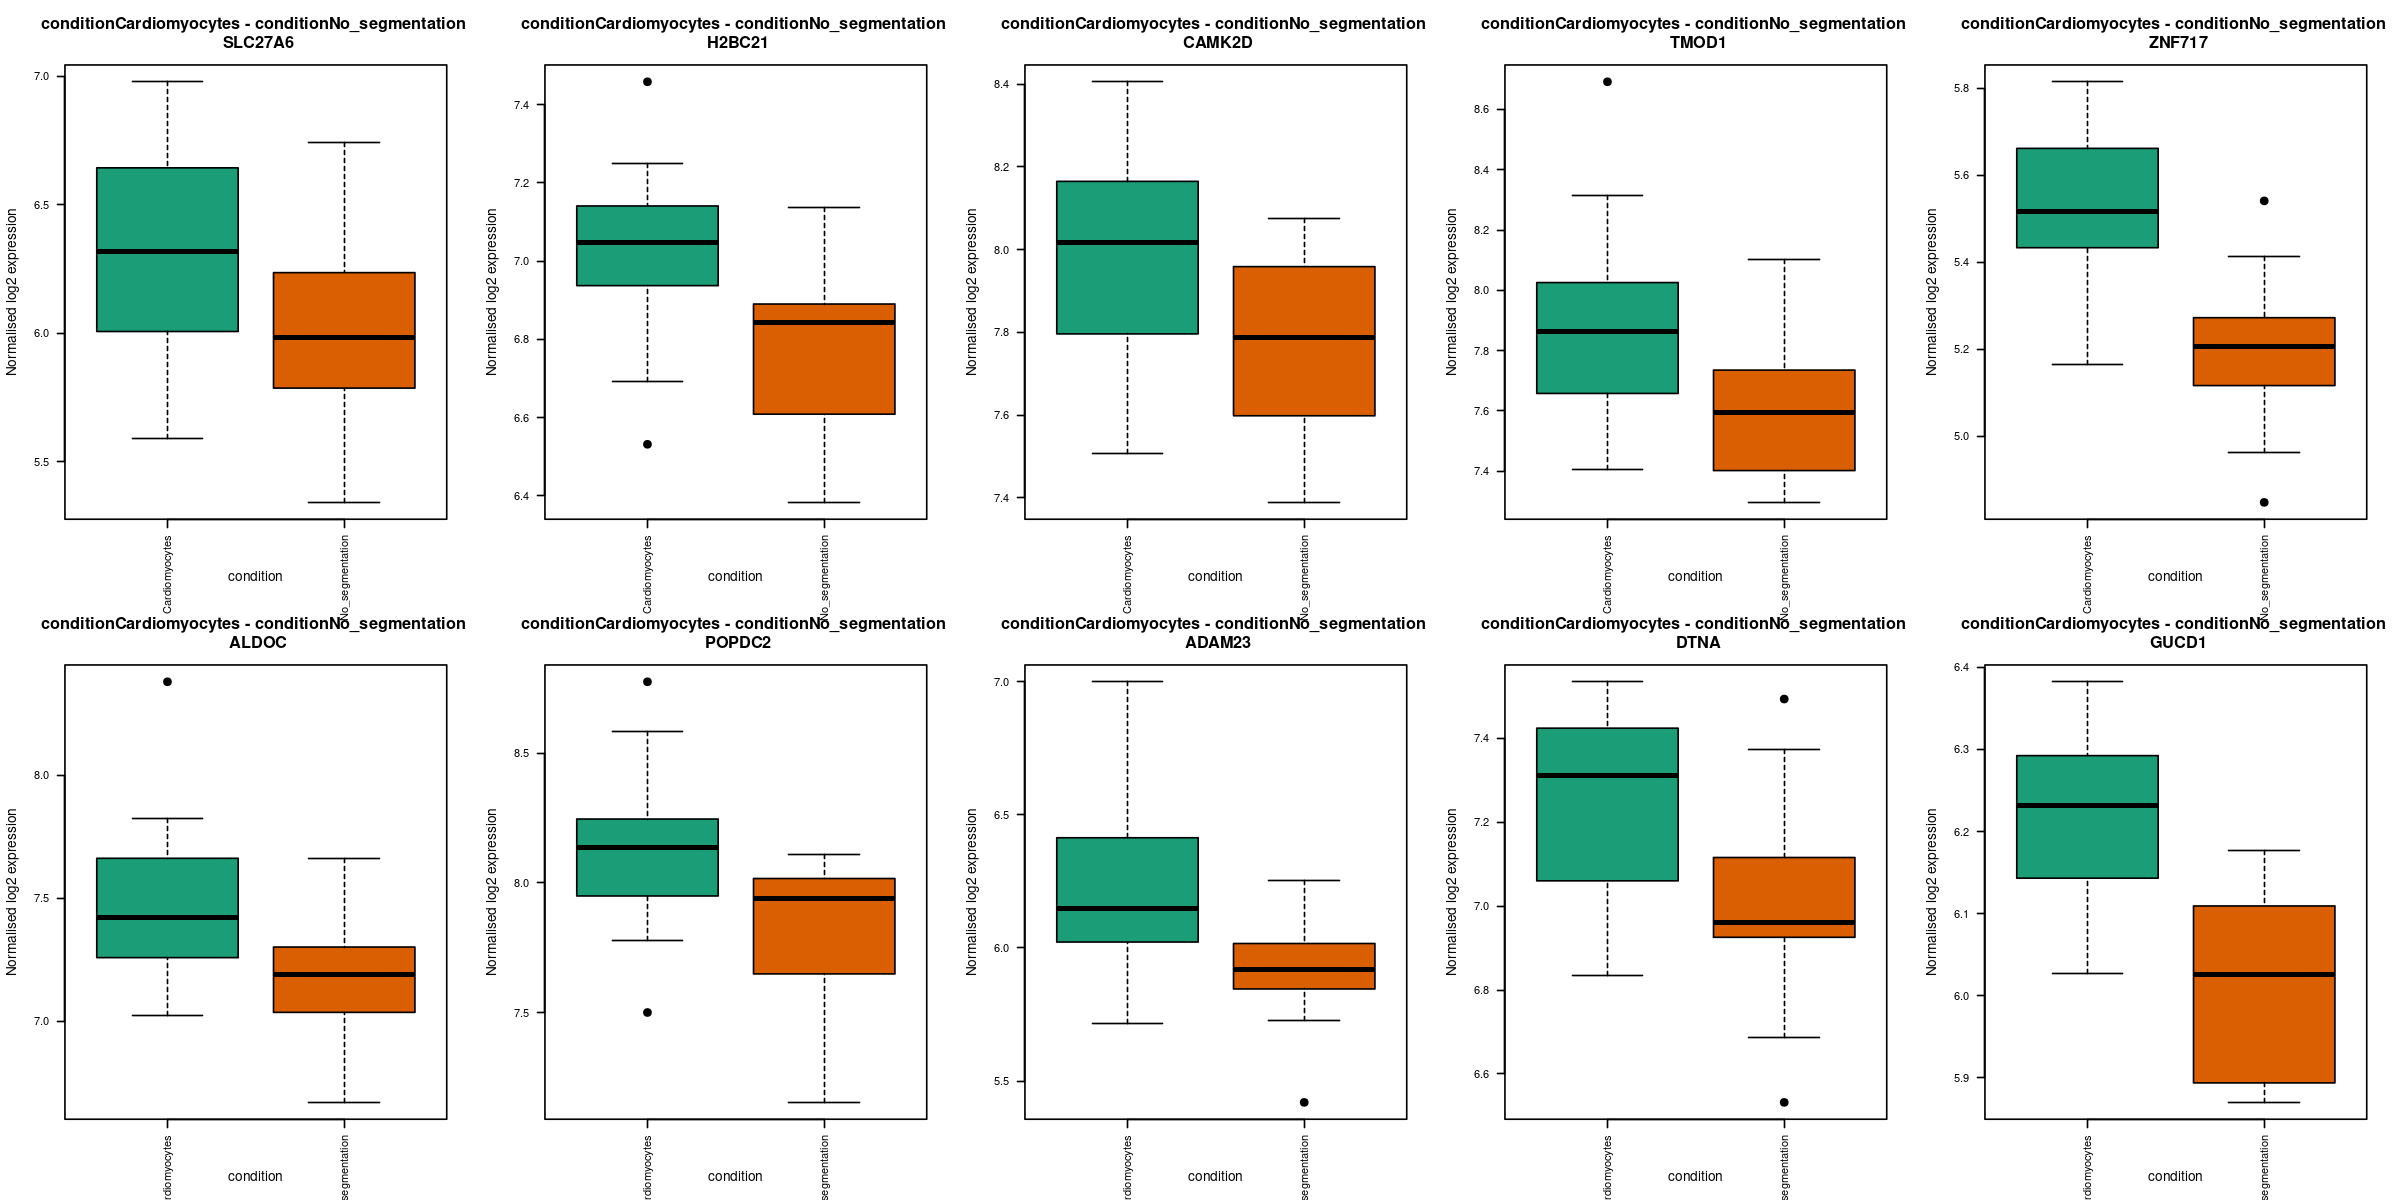

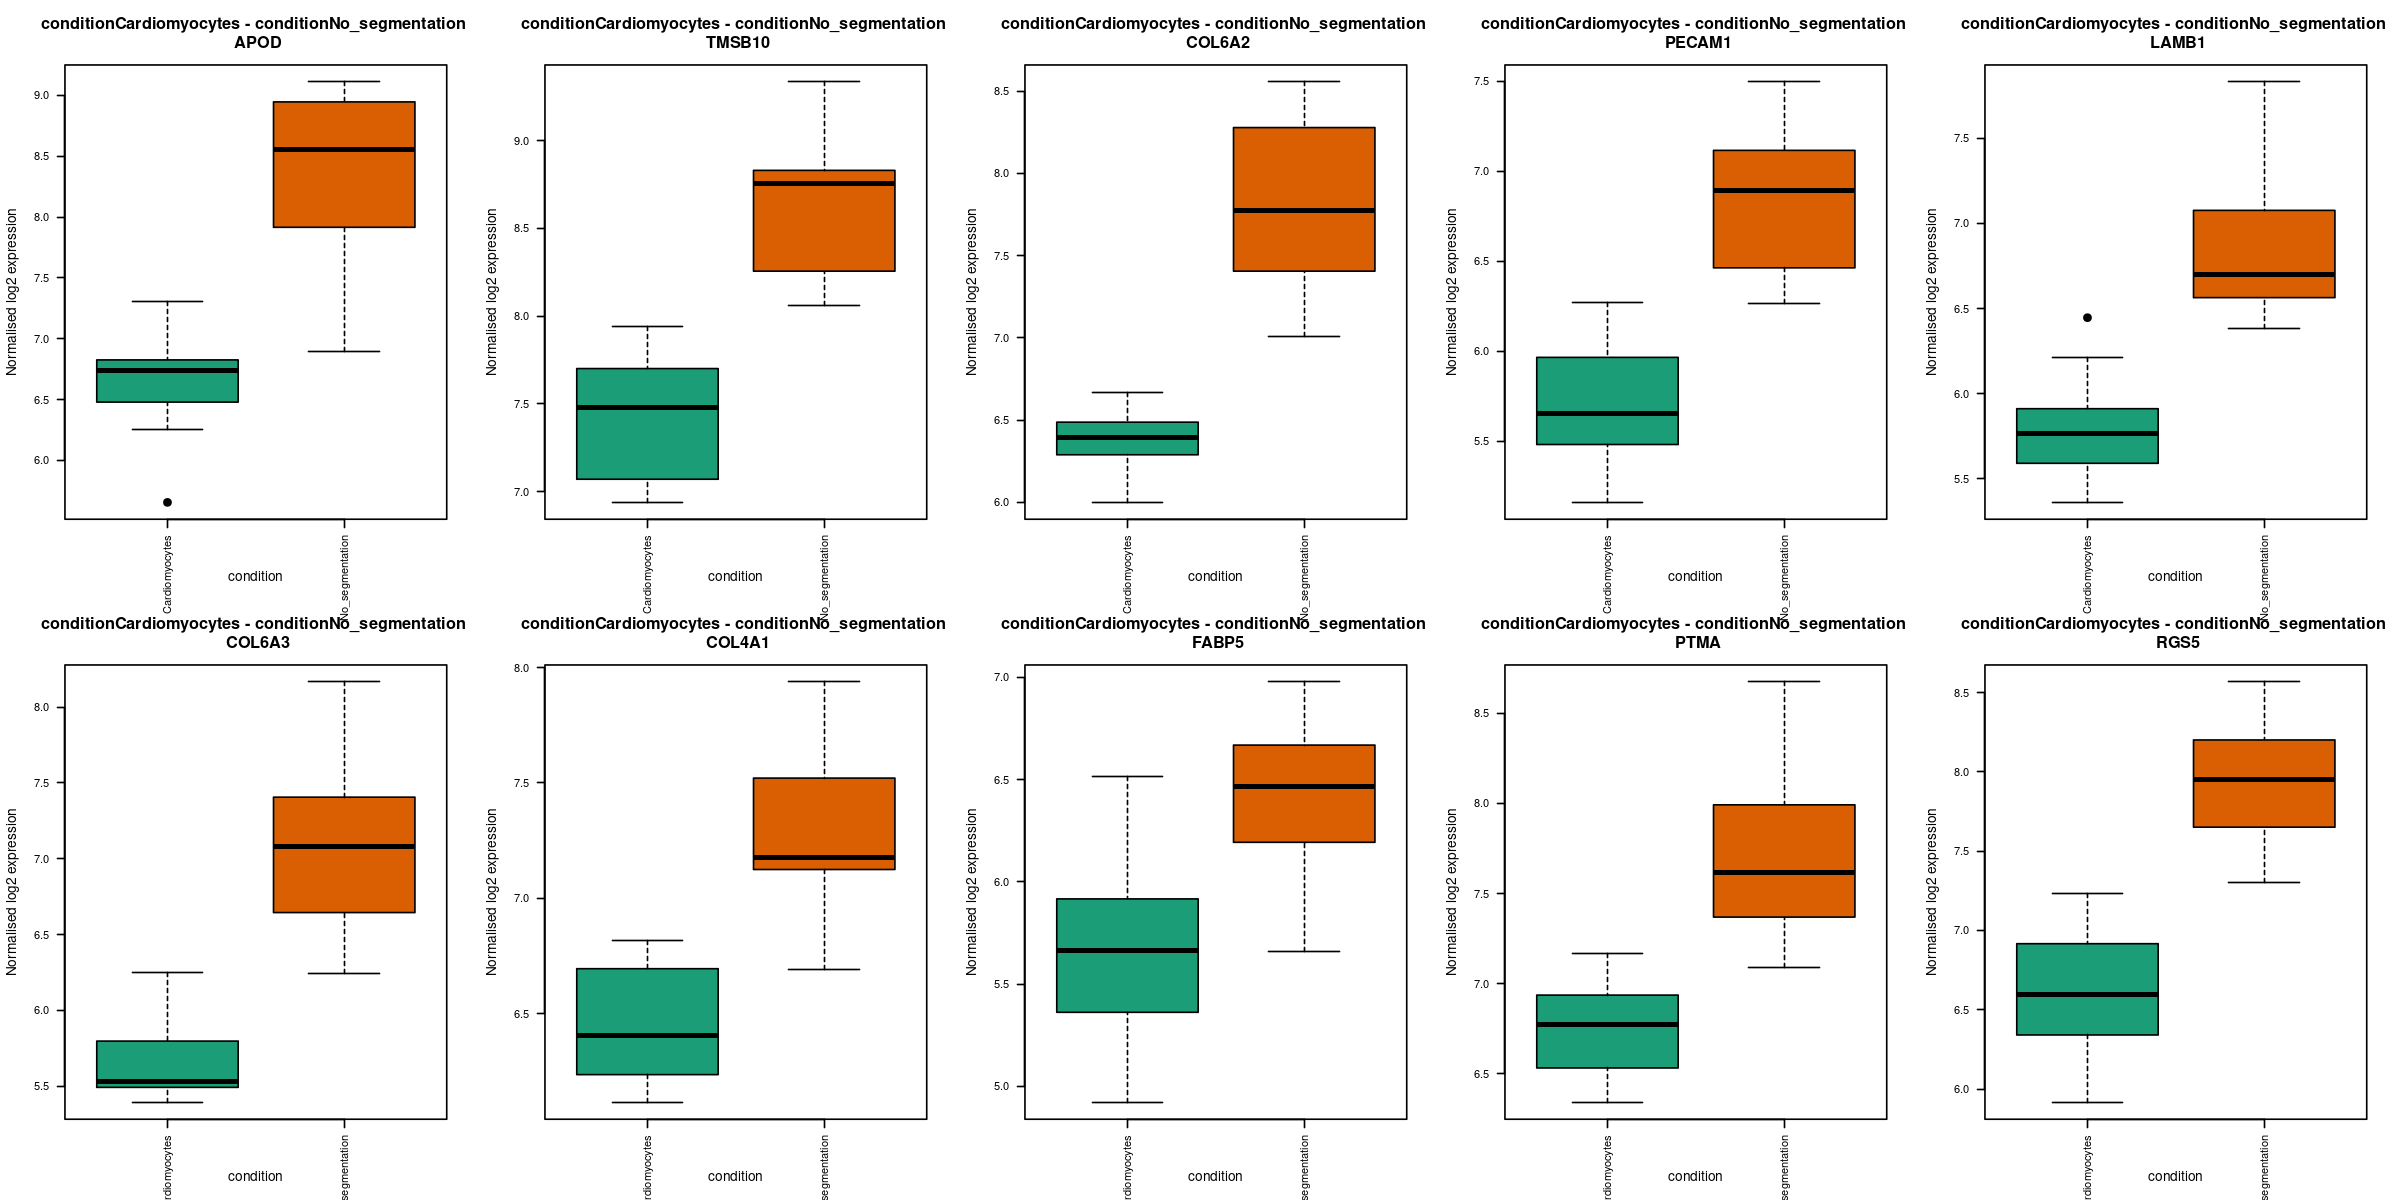

In [101]:
for (a in colnames(L)){
    table_tmp = topTable(fit, coef=a, sort.by="P", adjust.method="BH", number=Inf)
    Pos_tmp <-table_tmp[table_tmp[["logFC"]]>0,]$SYMBOL[1:10]
    Neg_tmp <-table_tmp[table_tmp[["logFC"]]<0,]$SYMBOL[1:10]

    # topTable(fit, coef=a, number=20)$SYMBOL
    options(repr.plot.width=20, repr.plot.height=10)
    par(mfrow=c(2,5))
    
    for (i in Pos_tmp){
        boxplot(vobjDream$E[i,]~condition,vertical=TRUE,las=2,cex.axis=0.8,pch=16,cex=1.3,col=nice.col,method="jitter",ylab="Normalised log2 expression",main=paste(a, "\n",i)) 
    }
    for (i in Neg_tmp){
        boxplot(vobjDream$E[i,]~condition,vertical=TRUE,las=2,cex.axis=0.8,pch=16,cex=1.3,col=nice.col,method="jitter",ylab="Normalised log2 expression",main=paste(a, "\n",i)) 
    }
}

In [137]:
options(repr.plot.width=9, repr.plot.height=8)


In [138]:
library(ggrepel)

Warning message:
"Removed 12759 rows containing missing values (`geom_text_repel()`)."
Warning message:
"ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


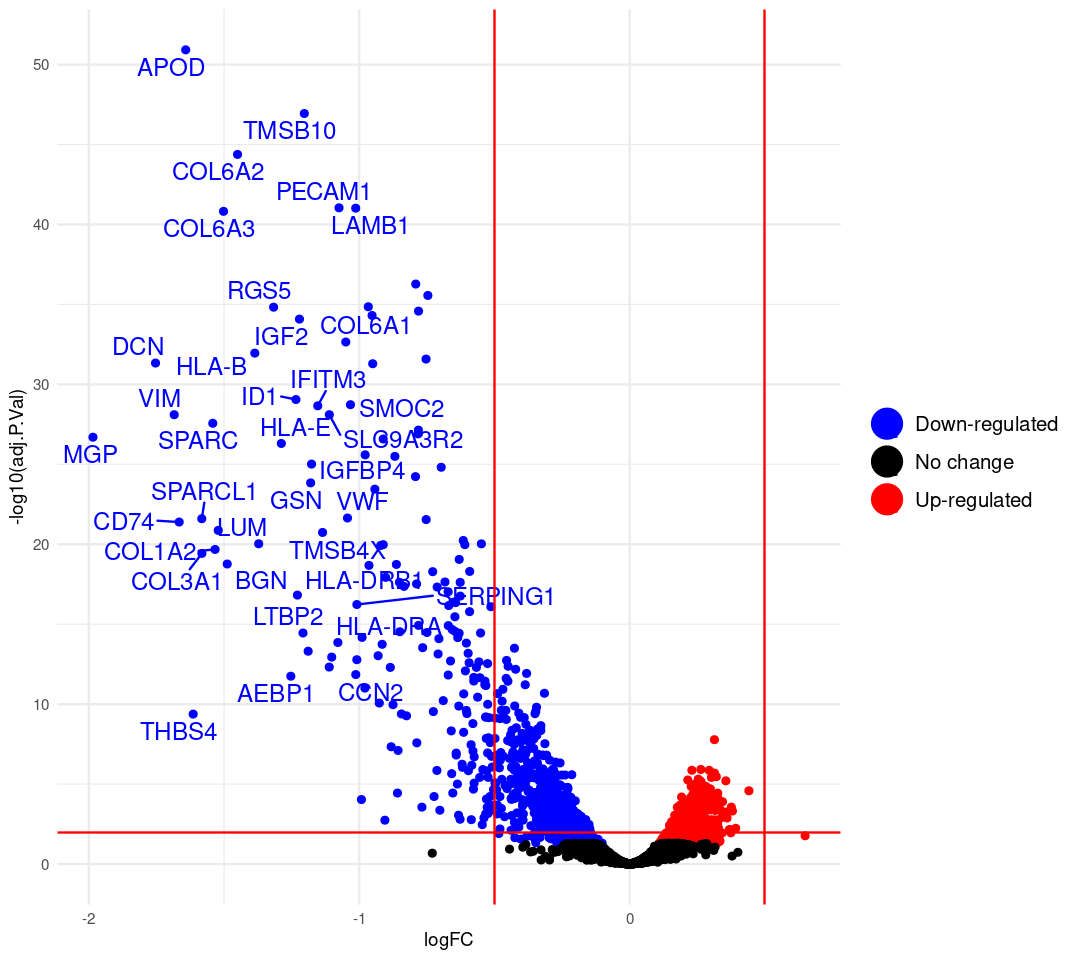

In [139]:
for (a in colnames(L)){
    table_tmp = topTable(fit, coef=a, sort.by="P", adjust.method="BH", number=Inf)
table_tmp$diffexpressed <- "NO"
table_tmp$diffexpressed[table_tmp$logFC > 0 & table_tmp$adj.P.Val < 0.05] <- "UP"
table_tmp$diffexpressed[table_tmp$logFC < 0 & table_tmp$adj.P.Val < 0.05] <- "DOWN"
table_tmp$delabel <- NA
table_tmp$delabel[table_tmp$logFC < -1 & table_tmp$adj.P.Val < 0.05] <- table_tmp$SYMBOL[table_tmp$logFC < -1 & table_tmp$adj.P.Val < 0.05]

    # plot adding up all layers we have seen so far
plot_tmp <-ggplot(data=table_tmp, aes(x=logFC, y=-log10(adj.P.Val), col=diffexpressed, label=delabel)) +
        geom_point() + 
        theme_minimal() +
        geom_text_repel(size=5, 
            ) +
        scale_color_manual(values=c("blue", "black", "red"), labels=c('Down-regulated', 'No change', 'Up-regulated')) +
        geom_vline(xintercept=c(-0.5, 0.5), col="red") +
        geom_hline(yintercept=-log10(0.01), col="red") +
    theme(legend.title=element_blank(),
     legend.text = element_text(size=12)) +
    guides(color = guide_legend(override.aes = list(size = 8))) 
    print(plot_tmp)
    }

# GO ORA

In [140]:
library(clusterProfiler)
library(enrichplot)
library(cluster)
library(msigdbr)

In [143]:
msig_c8 <- msigdbr(species = "Homo sapiens", category = "C8") %>%
    dplyr::select(gs_name, entrez_gene) %>%
    dplyr::rename(ont = gs_name, gene = entrez_gene)

### ORA

In [144]:
# Pos_ora_hm_list <- list()
Neg_ora_hm_list <- list()

for (a in colnames(L)){
    table_tmp = topTable(fit, coef=a, sort.by="P", adjust.method="BH", number=Inf)
    # Pos_tmp <-table_tmp[table_tmp[["logFC"]]>0&table_tmp[["P.Value"]]<0.05,]$ENTREZID
    # print(head(Pos_tmp))
    # print(head(table_tmp$ENTREZID))
    # Pos_ora_hm <- enricher(gene = Pos_tmp,
    #                    universe = table_tmp$ENTREZID,
    #             pAdjustMethod = "BH",
    #             minGSSize = 15,
    #             maxGSSize = 500,
    #             pvalueCutoff  = 0.05,
    #             qvalueCutoff  = 0.2,
    #             TERM2GENE = msig_h
    #             ) %>% as_tibble
    
    # Pos_ora_hm_list[[length(Pos_ora_hm_list)+1]] <- datatable(Pos_ora_hm)
    
    # negative 

    Neg_tmp <-table_tmp[table_tmp[["logFC"]]<(-0.5)&table_tmp[["adj.P.Val"]]<0.01,]$ENTREZID

    Neg_ora_c8 <- enricher(gene = Neg_tmp,
             universe = table_tmp$ENTREZID,
                pAdjustMethod = "BH",
                minGSSize = 15,
                maxGSSize = 500,
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.2,
                TERM2GENE = msig_c8
                )
    # ) %>% as_tibble
    # Neg_ora_hm_list[[length(Neg_ora_hm_list)+1]] <- datatable(Neg_ora_hm)

    }

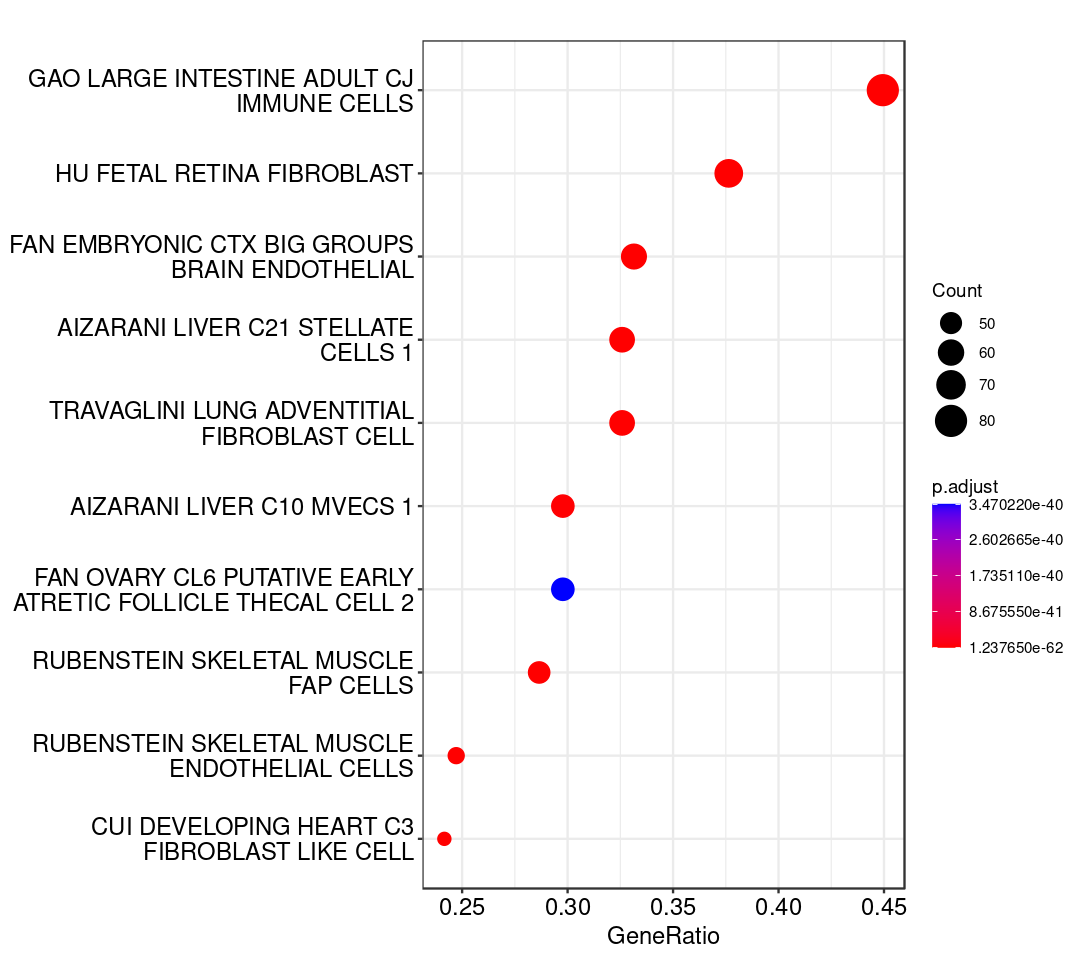

In [145]:
(dot_1<- dotplot(Neg_ora_c8, showCategory=10,   font.size = 14,
))

In [146]:
library(gridExtra)


In [116]:
# p_htmap_grid<-grid.grabExpr(draw(p_htmap))

In [117]:
options(repr.plot.width=18, repr.plot.height=8)

## Figure 3B,D

Warning message:
"Removed 12759 rows containing missing values (`geom_text_repel()`)."
Warning message:
"ggrepel: 19 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


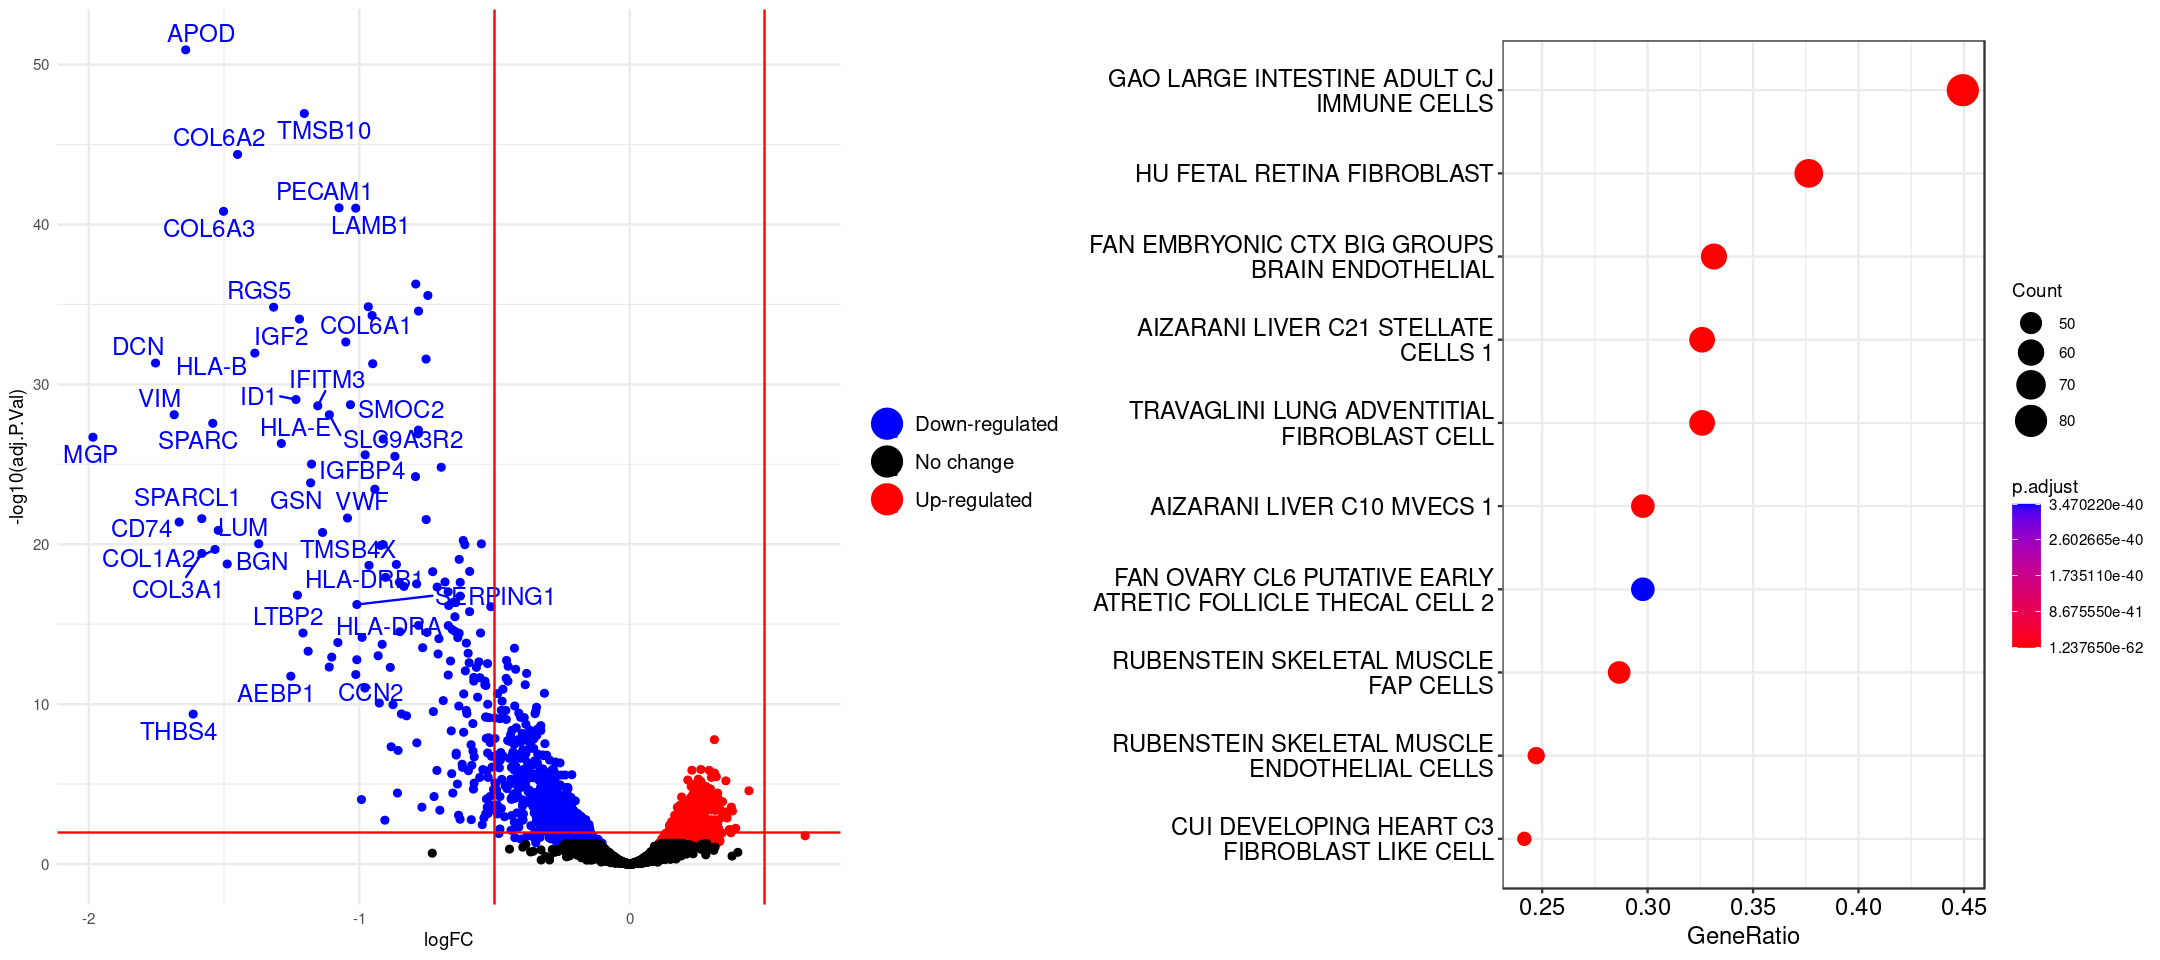

In [124]:
grid.arrange(plot_tmp, dot_1, ncol=2
            
        )


# Save image & sessionInfo()

In [133]:
save.image(file = file.path(getwd(), paste("Spatialanalysis", Analysis_name, "analysis.RData", sep="_")))



In [134]:
print(file.path(getwd(), paste("Spatialanalysis", Analysis_name, "analysis.RData", sep="_")))

[1] "/gpfs/group/home/salee/Spatial_CMP/Spatialanalysis_SejongIn_Segment.id_FullROI_Y_cellselection_Y_Cardiomyocytes_No_segmentation_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_ID.block.core_Institute_KR_Y2023-06-22_analysis.RData"


In [135]:
sessionInfo()

R version 4.0.0 (2020-04-24)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS:   /opt/applications/R/4.0.0/gnu/lib64/R/lib/libRblas.so
LAPACK: /opt/applications/R/4.0.0/gnu/lib64/R/lib/libRlapack.so

locale:
[1] C

attached base packages:
 [1] grid      stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] msigdbr_7.5.1             enrichplot_1.21.0.991    
 [3] clusterProfiler_4.2.1     ComplexHeatmap_2.4.3     
 [5] DT_0.27                   data.table_1.14.8        
 [7] fgsea_1.14.0              RCy3_2.8.1               
 [9] GSA_1.03.1                RCurl_1.98-1.10          
[11] spatstat_3.0-3            spatstat.linnet_3.0-6    
[13] spatstat.model_3.2-1      rpart_4.1.19             
[15] spatstat.explore_3.1-0    spatstat.random_3.1-4    
[17] spatstat.geom_3.1-0       spatstat.data_3.0-1      
[19] bigutilsr_0.3.4           GEOquery_2.56.0        